# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [147]:
df.shape

(614, 13)

In [148]:
df= df.drop_duplicates()

In [149]:
df.shape

(614, 13)

In [150]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [152]:
# we have to remove the null values

In [153]:
null_valued_columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed','LoanAmount']

In [154]:
#fill up or replace the null
df["Loan_Amount_Term"].replace(np.nan, df["Loan_Amount_Term"].mean(), inplace = True)
df["Dependents"].replace(np.nan, df["Dependents"].mode()[0], inplace = True)
df["Credit_History"].replace(np.nan, df["Credit_History"].mean(), inplace = True)
df["Gender"].replace(np.nan, df["Gender"].mode()[0], inplace = True)
df["Married"].replace(np.nan, df["Married"].mode()[0], inplace = True)
df["Self_Employed"].replace(np.nan, df["Self_Employed"].mode()[0], inplace = True)
df["LoanAmount"].replace(np.nan, df["LoanAmount"].mean(), inplace = True)

In [155]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [156]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
# We can see there no null values so we are good to proceed further!

In [158]:
df.nunique().to_frame("Unique values")

,Unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [160]:
# Loan_ID= It is just a unique number given to applicants that doesnot effect our target data
# So we can drop this column

In [161]:
df.drop(["Loan_ID"], axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [162]:
df.shape

(614, 12)

In [163]:
# no. of object data types:

object_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatypes.append(x)
object_datatypes

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [164]:
# so there are 7 object type columns

In [165]:
# no. of integer data types:

integer_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
      integer_datatypes.append(x)
integer_datatypes 

['ApplicantIncome']

In [166]:
# only one integer type column is present

In [167]:
# no. of float data types:

float_datatypes=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
      float_datatypes.append(x)
float_datatypes

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [168]:
# so there are 4 object type columns

In [169]:
# EDA and Visualization

In [170]:
# countplot for object types features

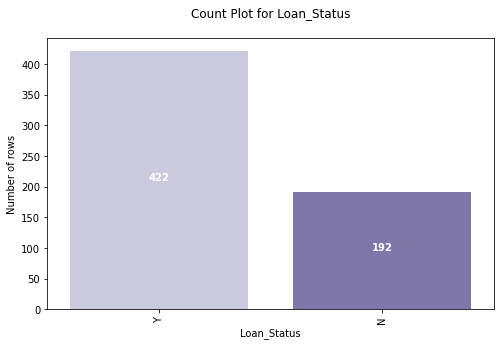

In [171]:
# Loan_Status

plt.figure(figsize=(8,5))
col_name = 'Loan_Status'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

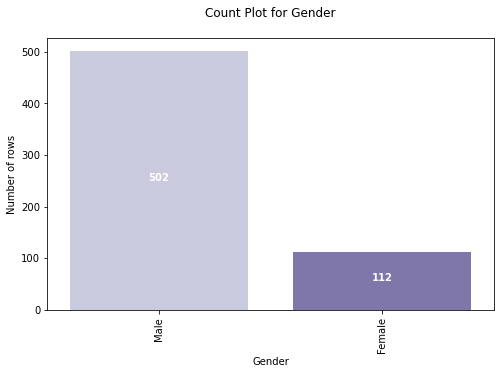

In [172]:
# Gender

plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

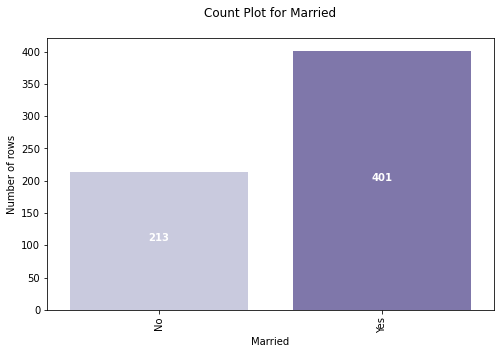

In [173]:
# Married

plt.figure(figsize=(8,5))
col_name = 'Married'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

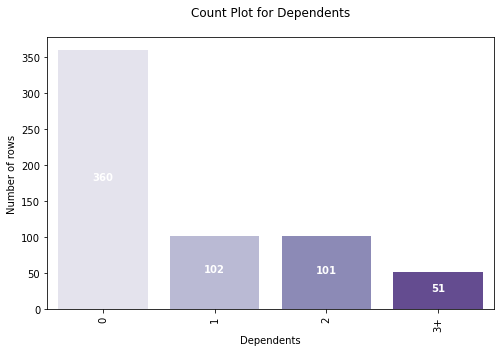

In [174]:
# Dependents

plt.figure(figsize=(8,5))
col_name = 'Dependents'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

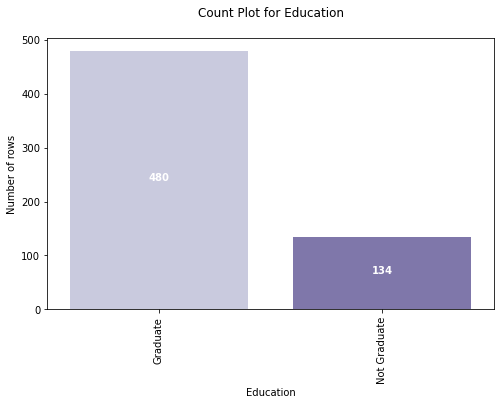

In [175]:
# Education

plt.figure(figsize=(8,5))
col_name = 'Education'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

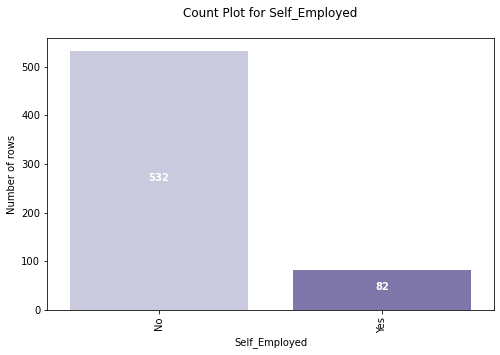

In [176]:
# Self_Employed

plt.figure(figsize=(8,5))
col_name = 'Self_Employed'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

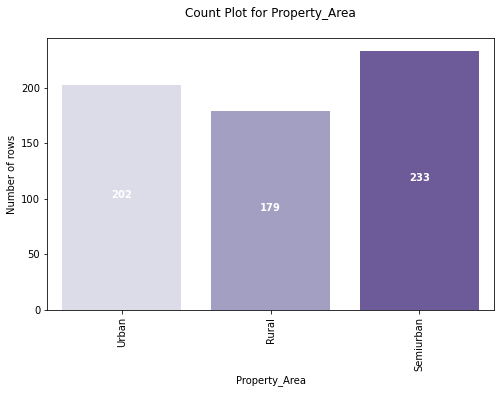

In [177]:
# Property_Area 

plt.figure(figsize=(8,5))
col_name = 'Property_Area'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Purples")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In [178]:
# distplot for numerical type features

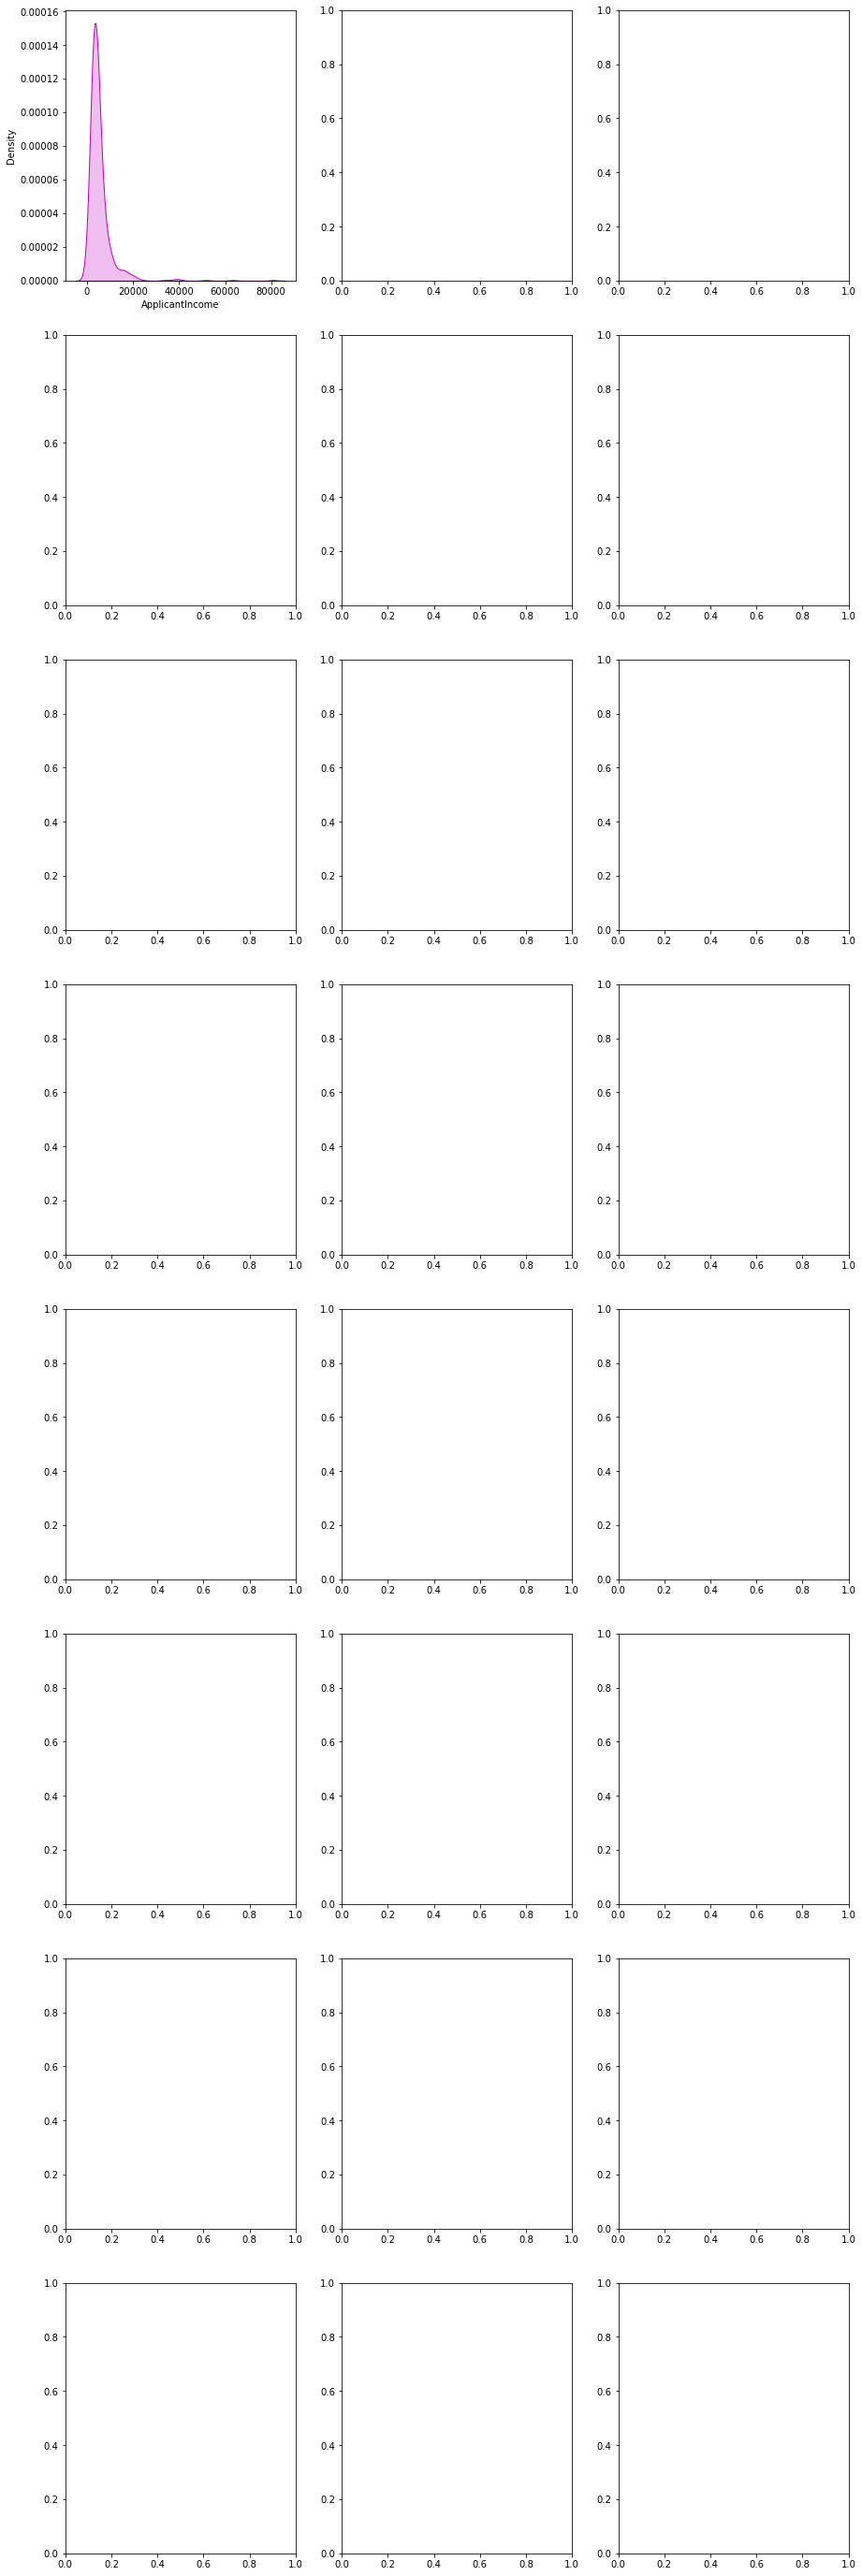

In [179]:
# integer:-

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

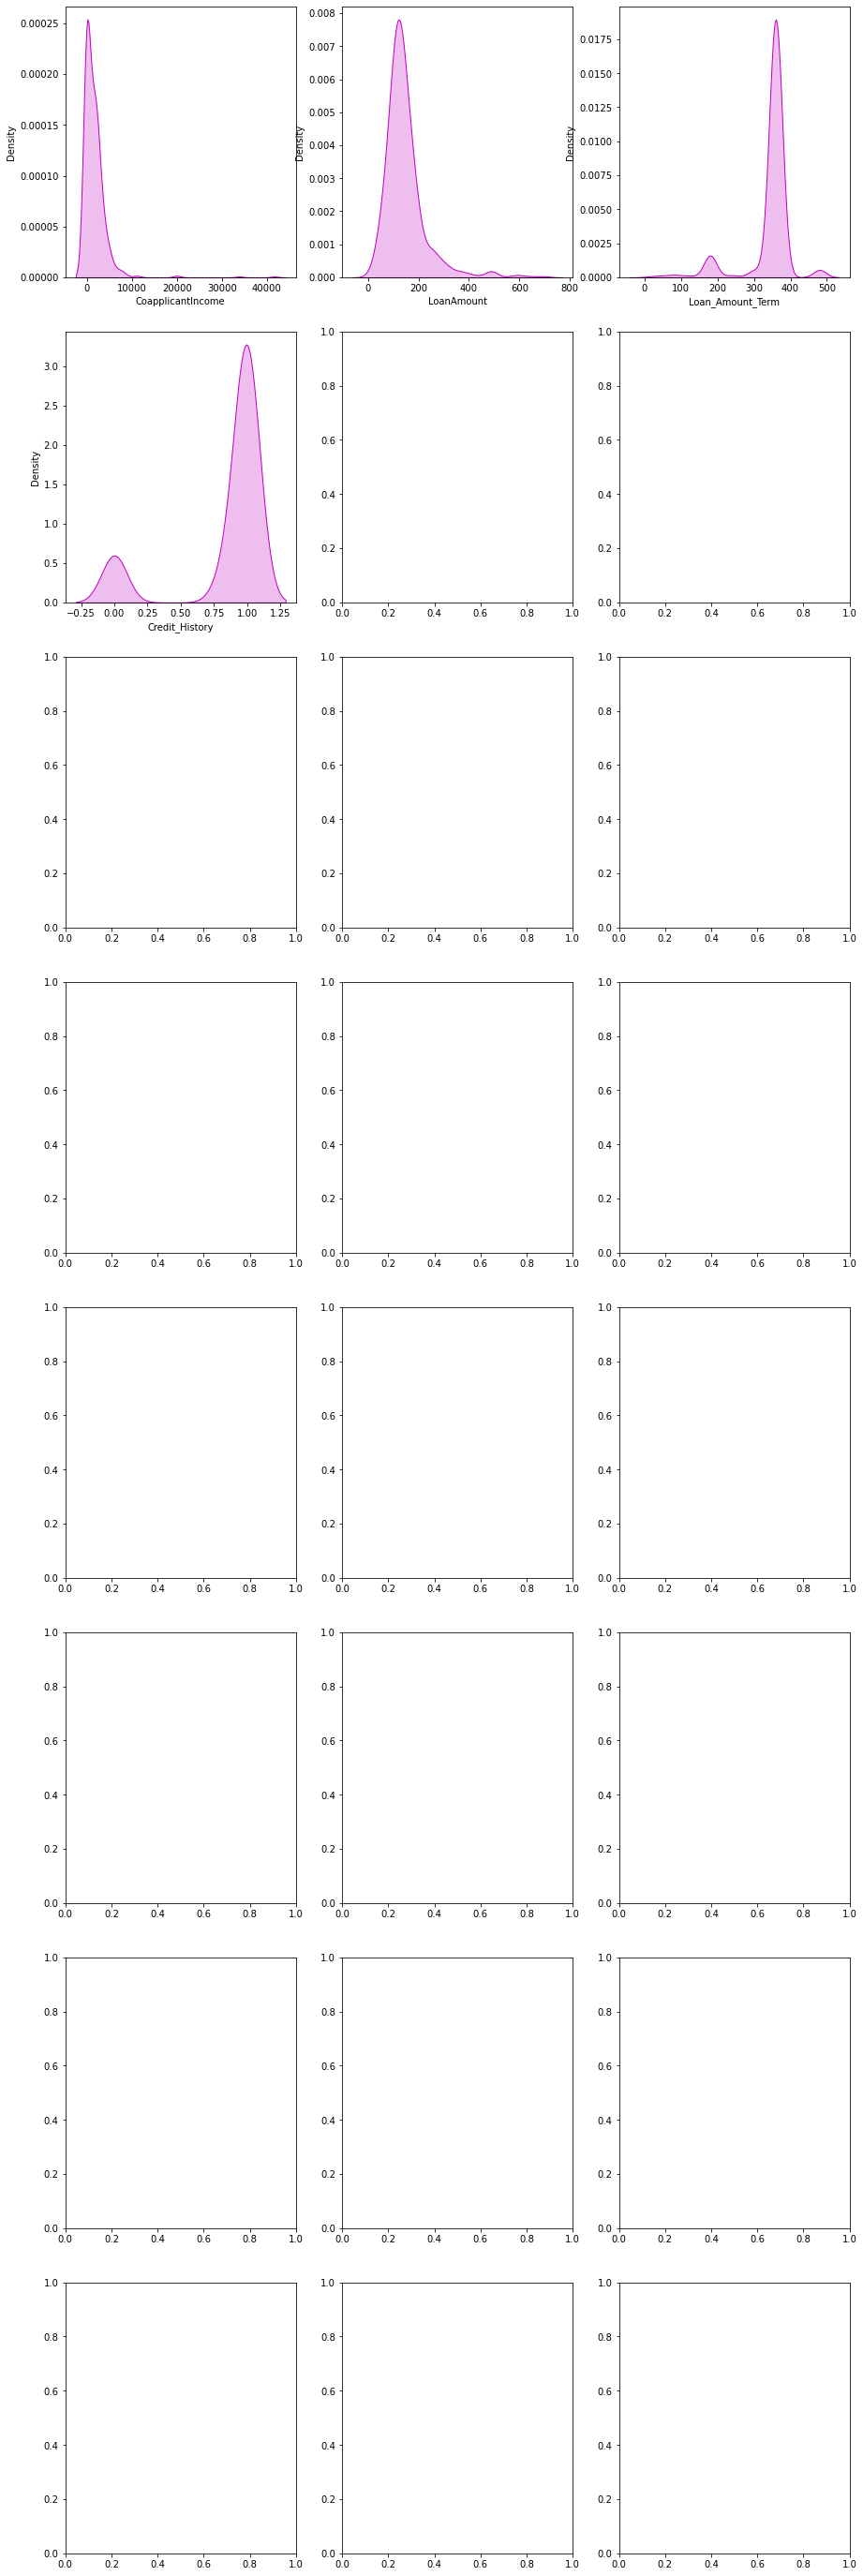

In [180]:
# float:-

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="m", kde_kws={"shade": True})
    index += 1
plt.show()

In [181]:
# from the above it is clear that there are some skewnesses in some of the graphs and they have to be rectified!

In [182]:
# to check the outliers let's check the boxplots first...

In [183]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [184]:
columns= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

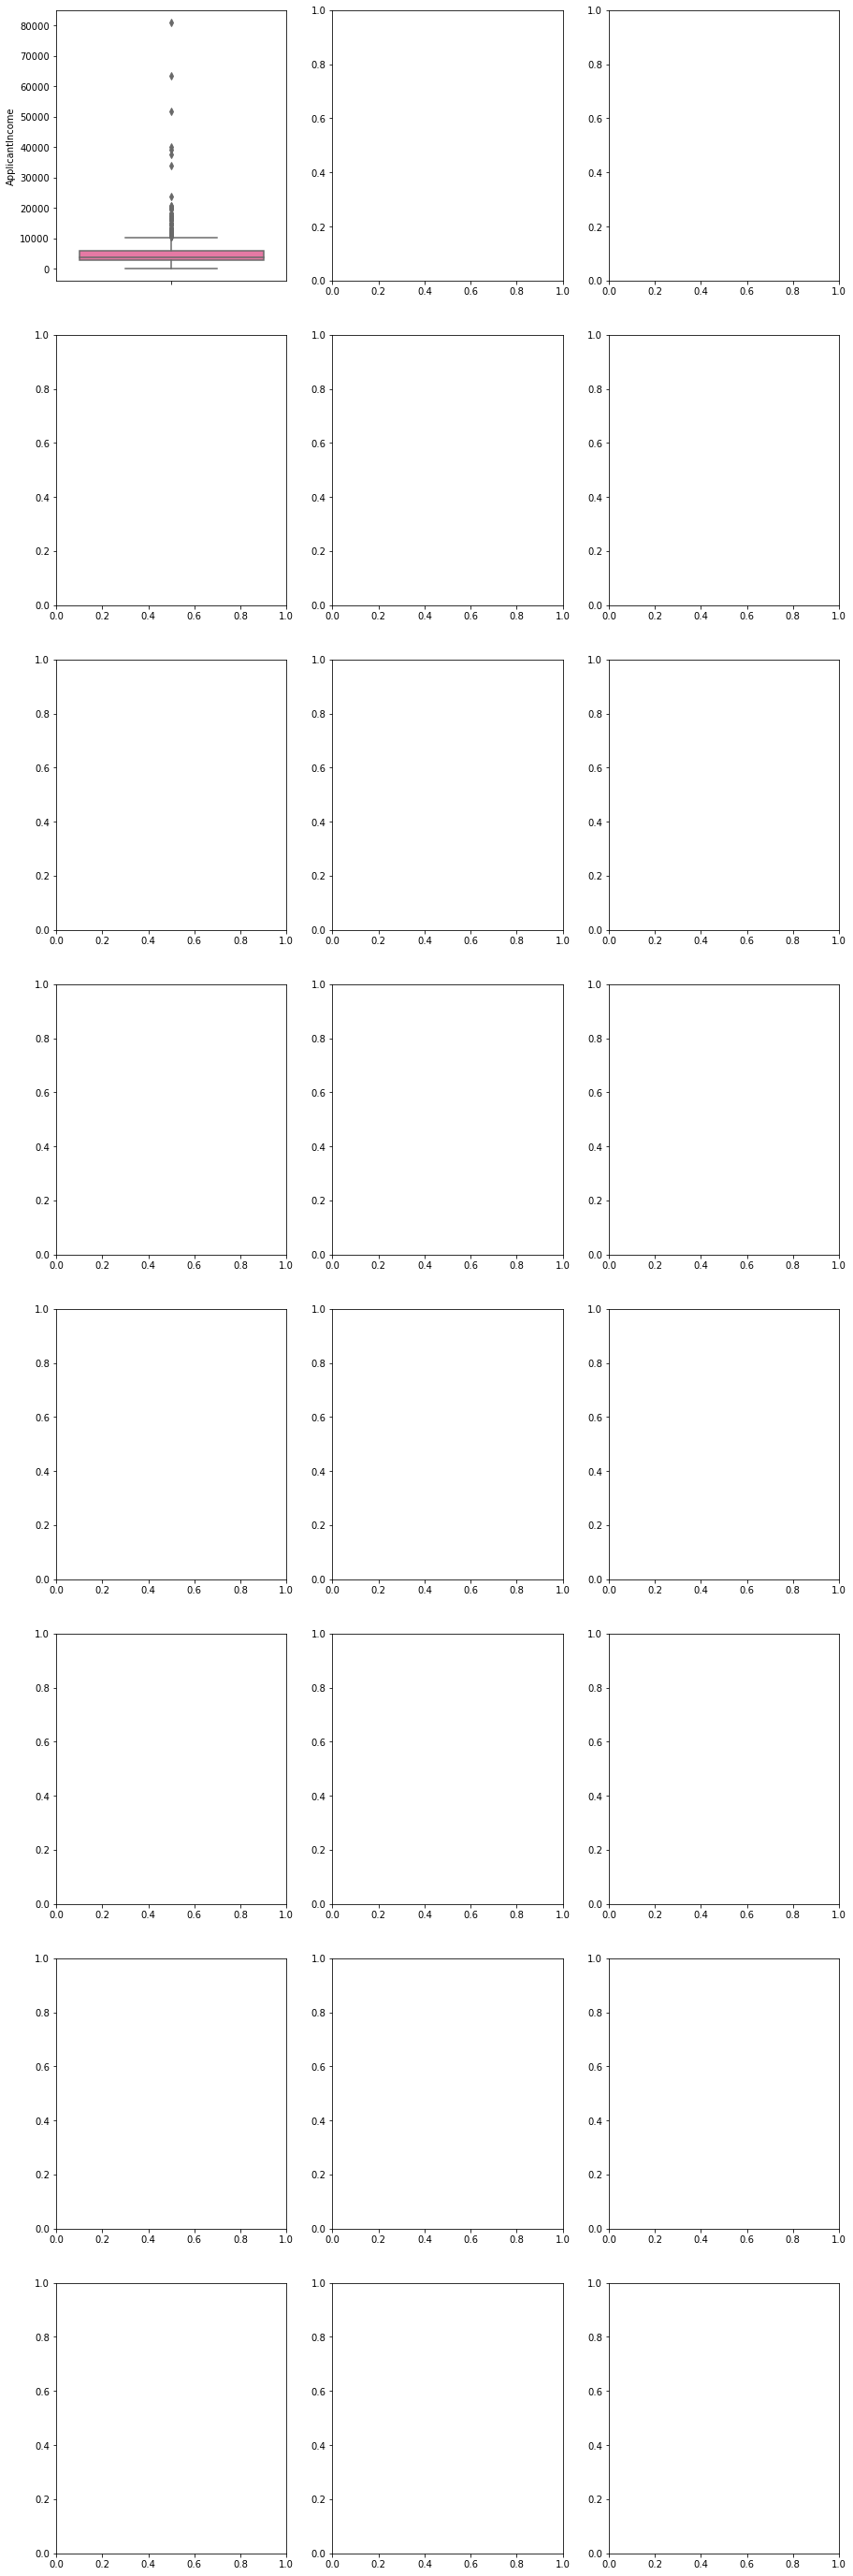

In [185]:
# Boxplot for the integer type feature

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

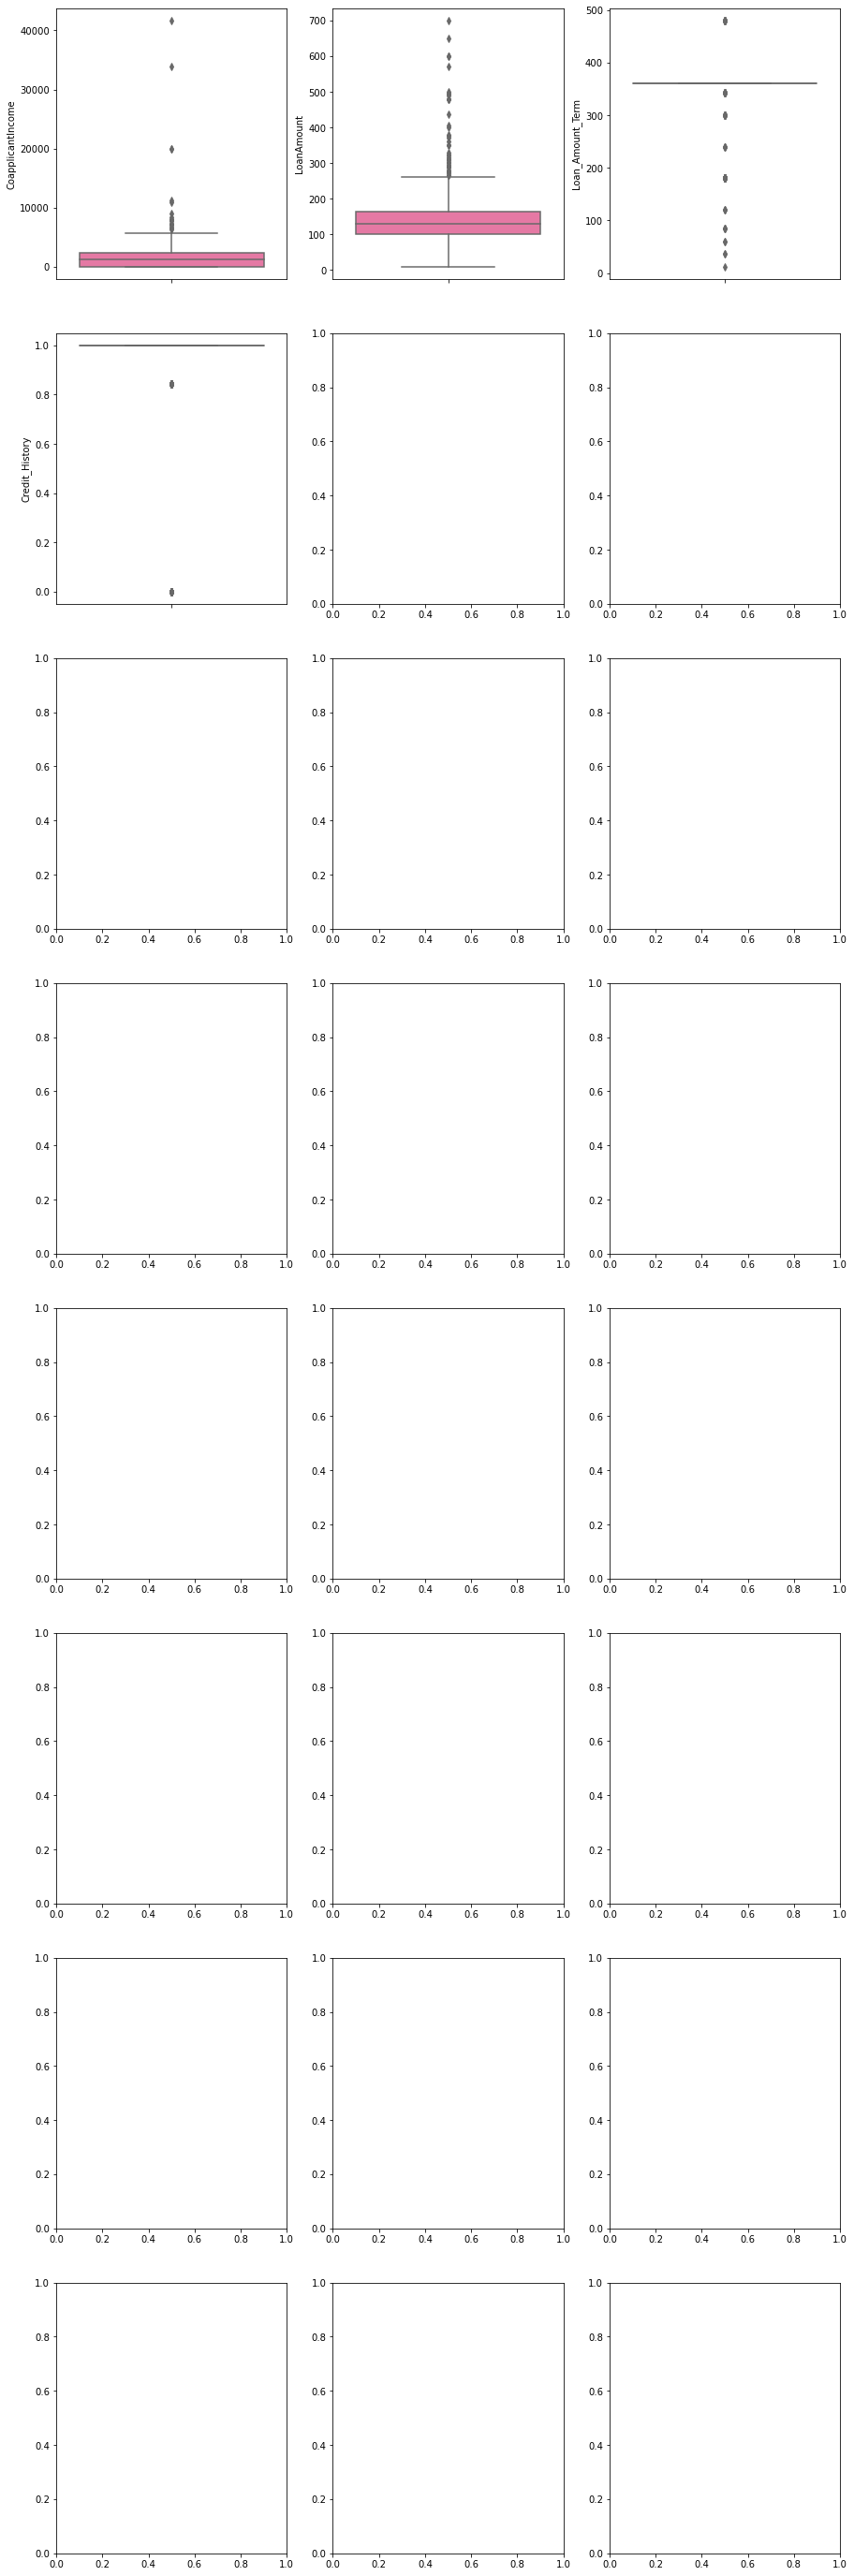

In [186]:
# Boxplot for the float type feature

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [187]:
# almost every feature has outliers and we have to remove them!

In [188]:
# Encoding the object datatype columns

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [190]:
# target column was object datatype so it is converted into integer type.

In [191]:
# let us now convert the remaining 6 feature columns which are also object data type

from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()

df['Gender'] = oec.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oec.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oec.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oec.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oec.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oec.fit_transform(df['Property_Area'].values.reshape(-1,1))

In [192]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


In [193]:
df.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

In [194]:
# we have successfully changed all the object type data into int or float type ones!

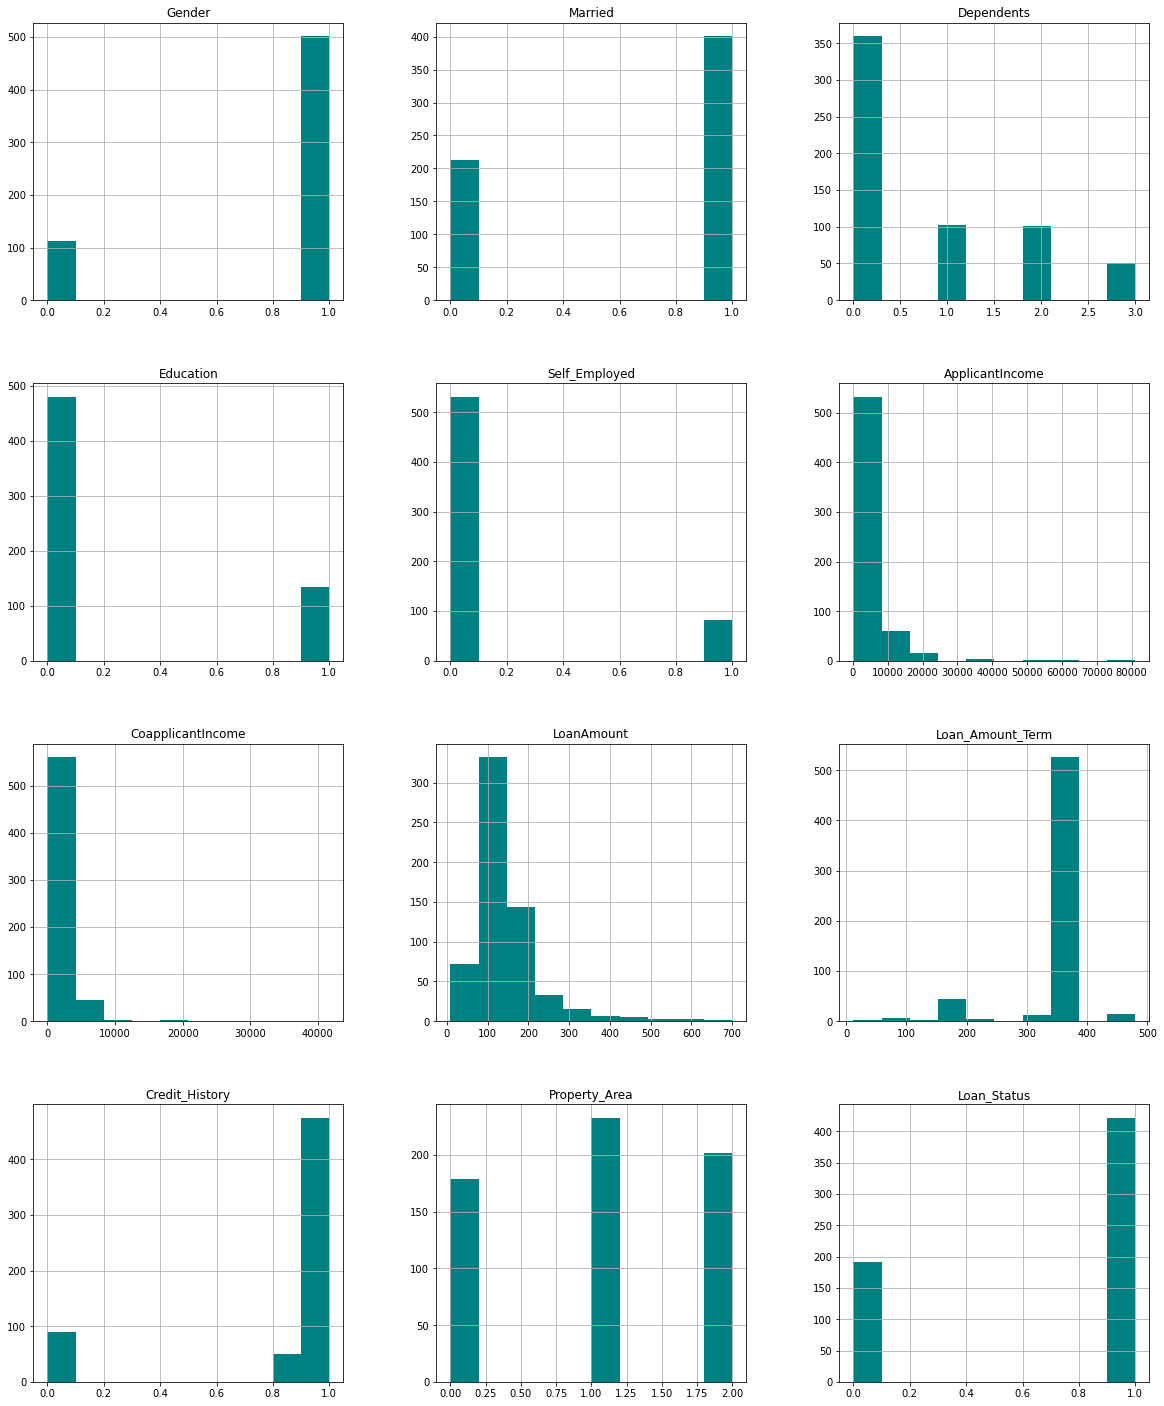

In [195]:
df.hist(figsize=(20,25), color= 'teal')
plt.show()

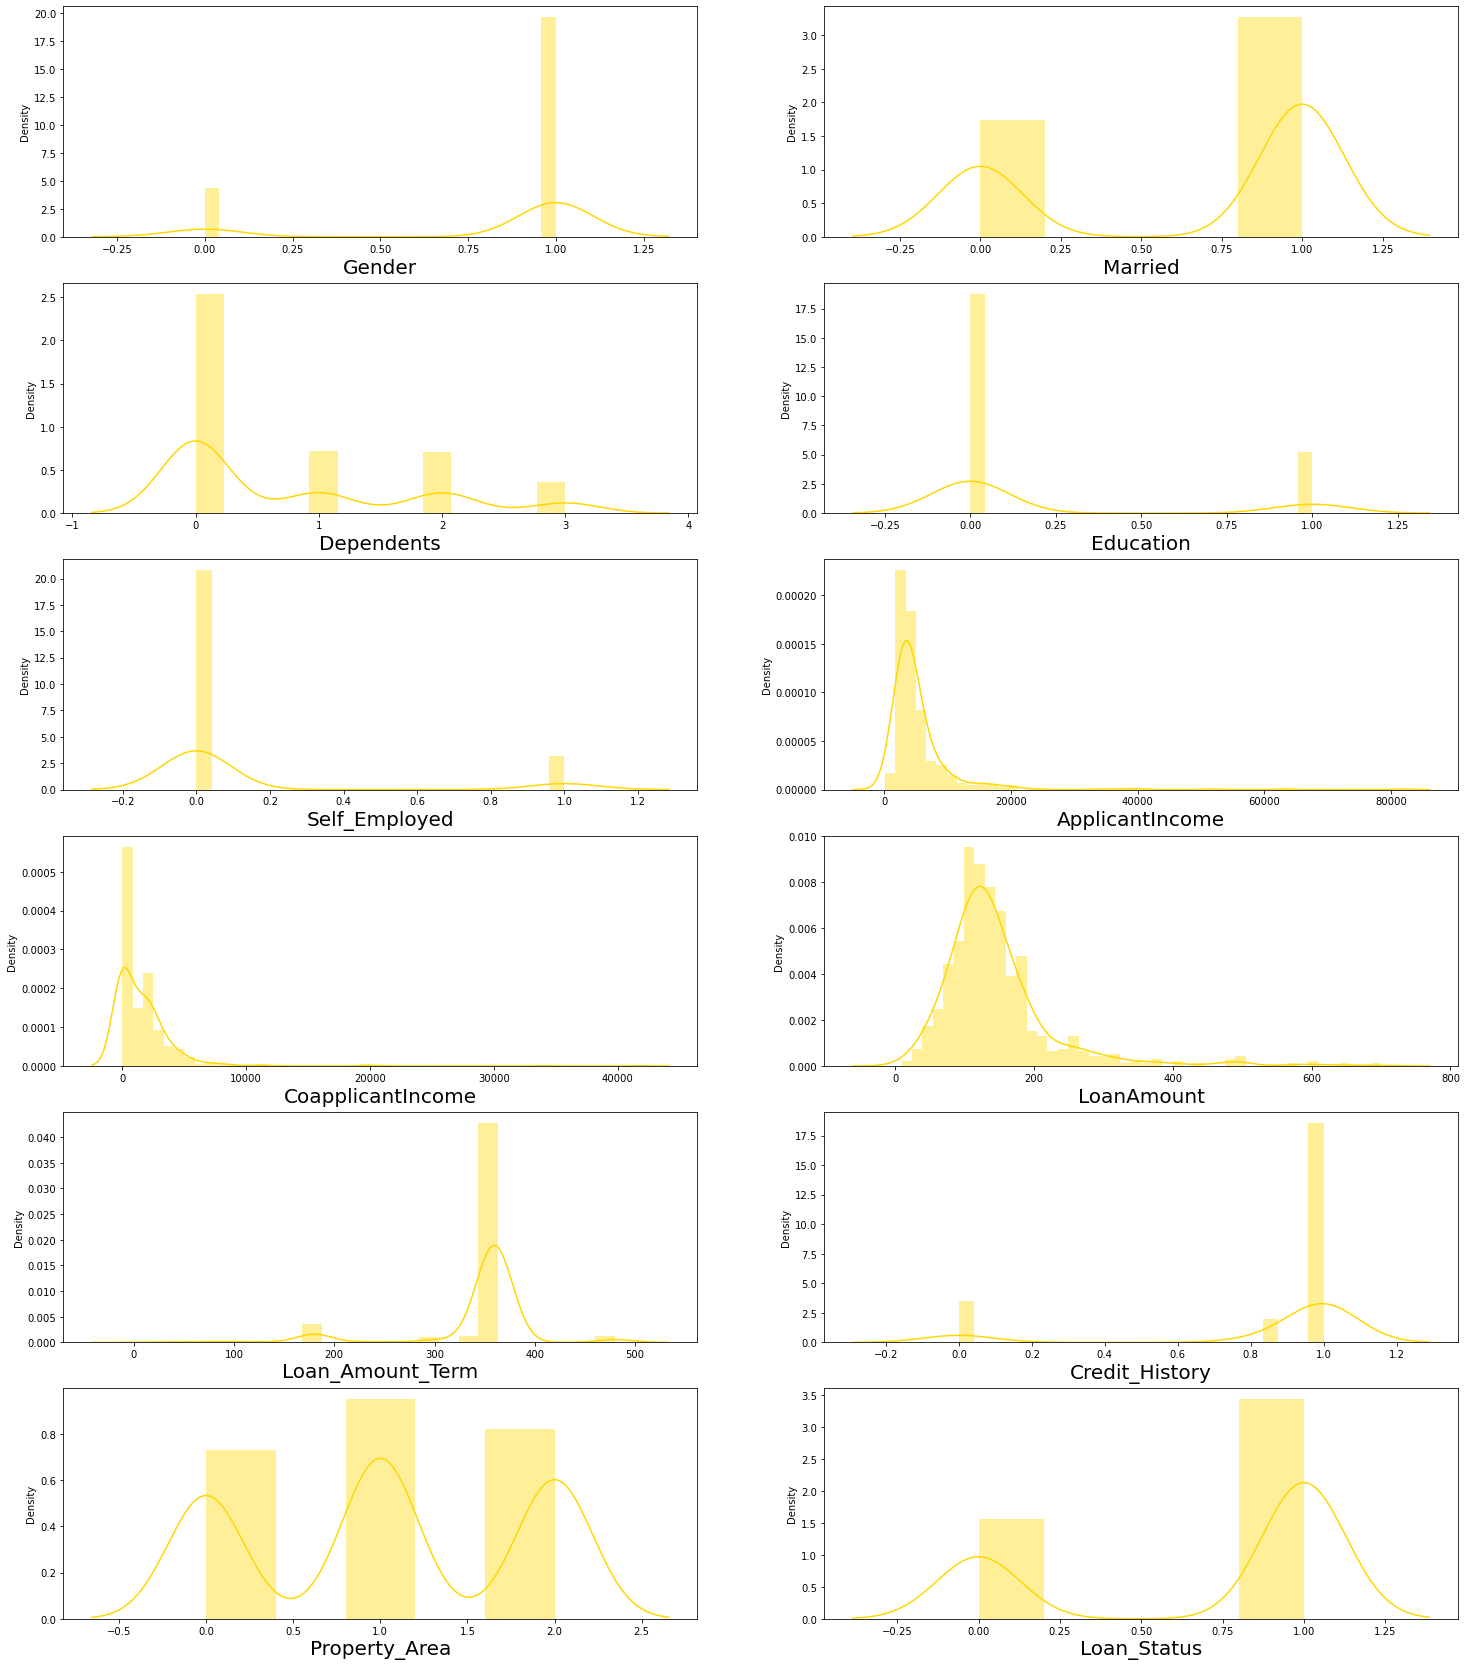

In [196]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'gold')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [197]:
# mostly normally distributed, but few has bit skewness!

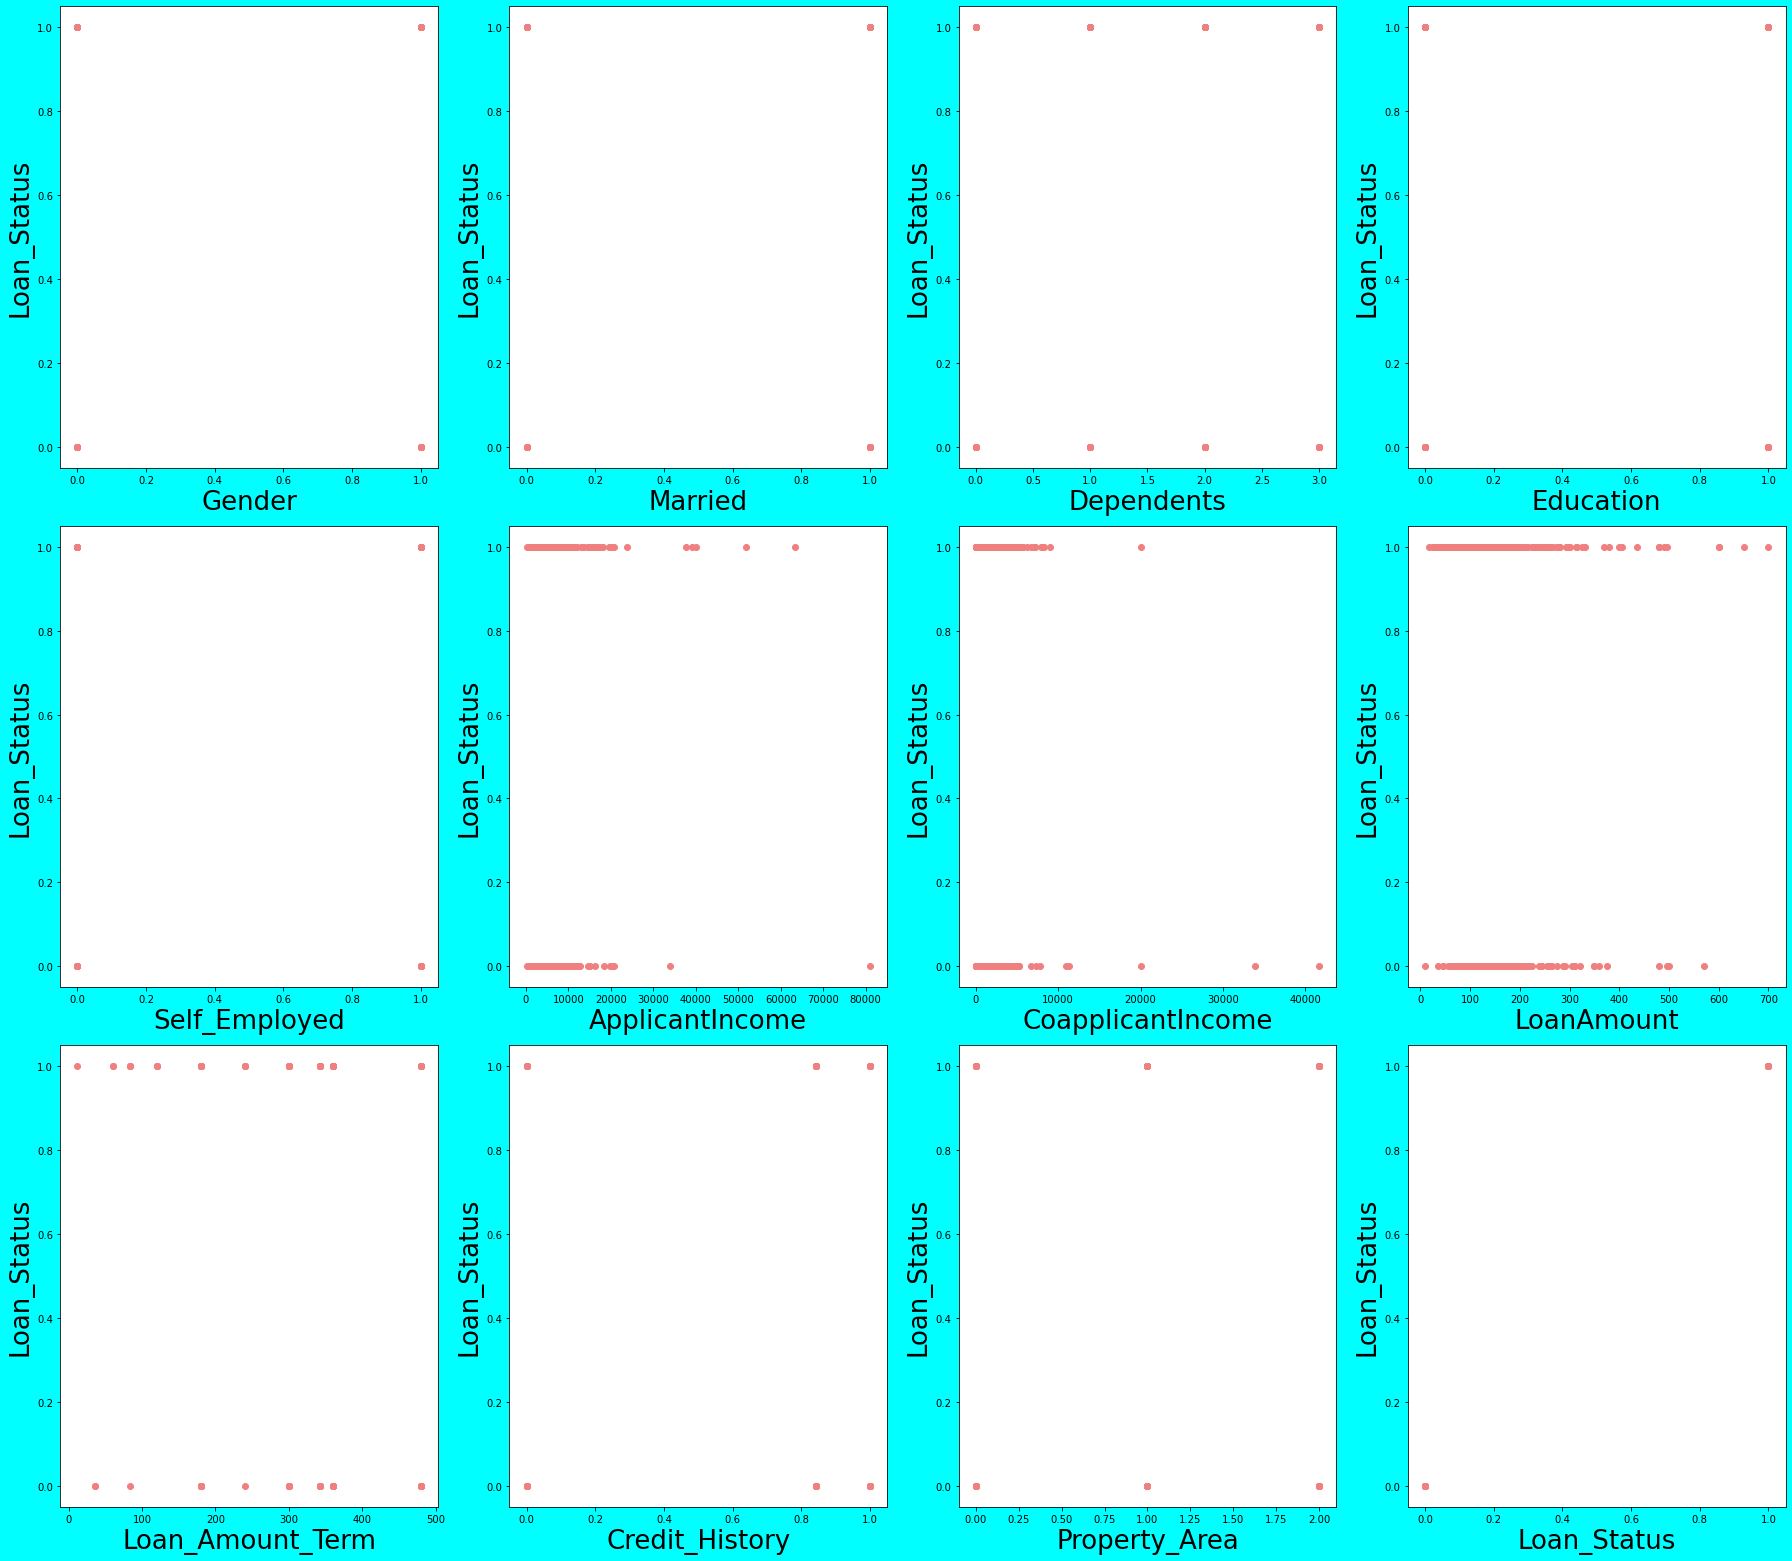

In [198]:
#Bivariate Analysis

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['Loan_Status'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Loan_Status', fontsize=26)
    plotnumber += 1
plt.tight_layout()

In [199]:
# not very clear conclusion can be drawn from above

<Figure size 1800x1440 with 0 Axes>

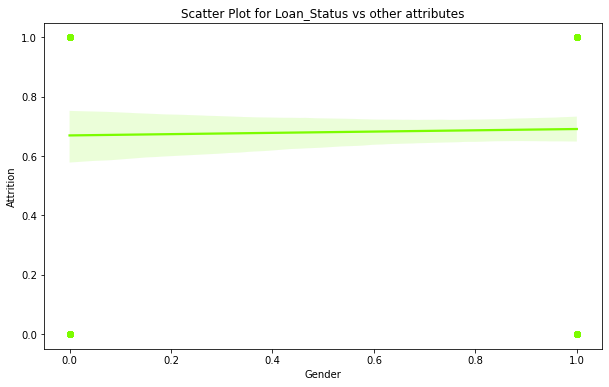

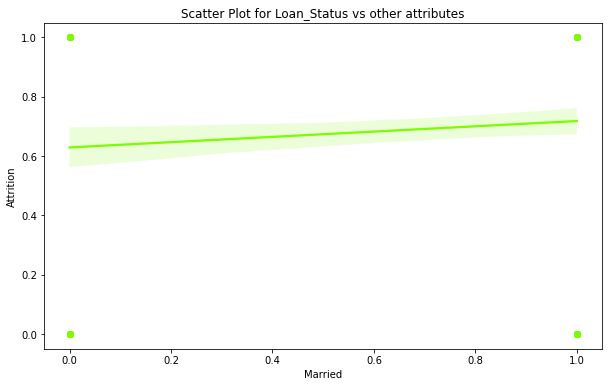

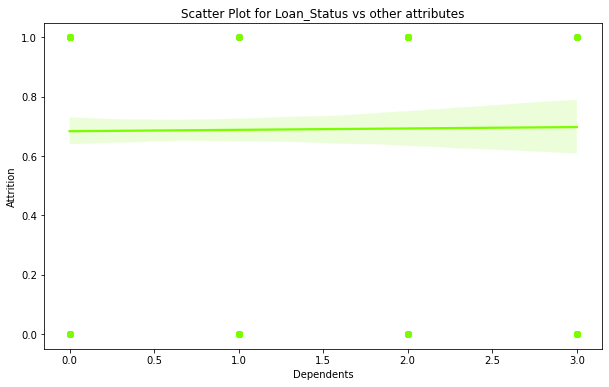

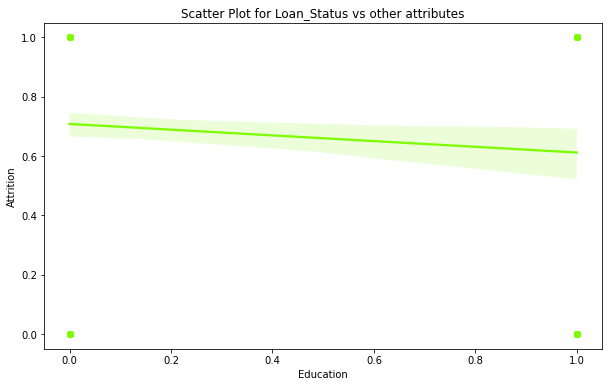

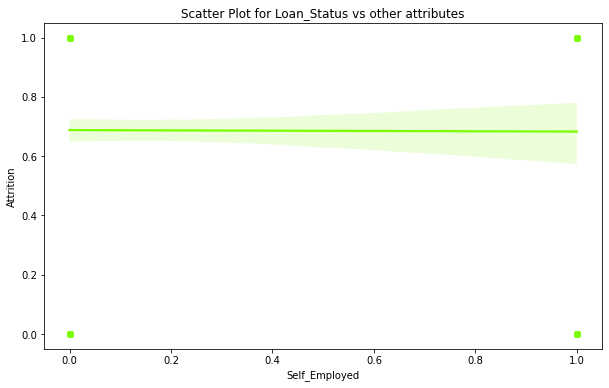

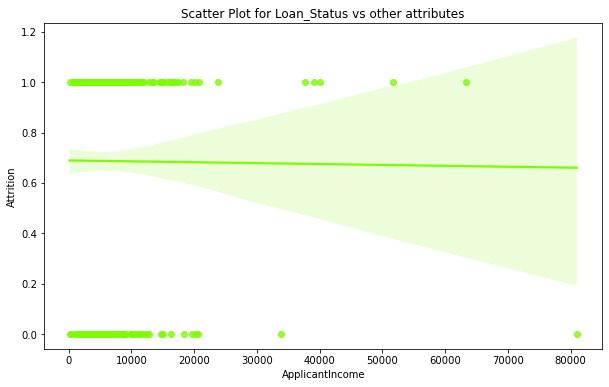

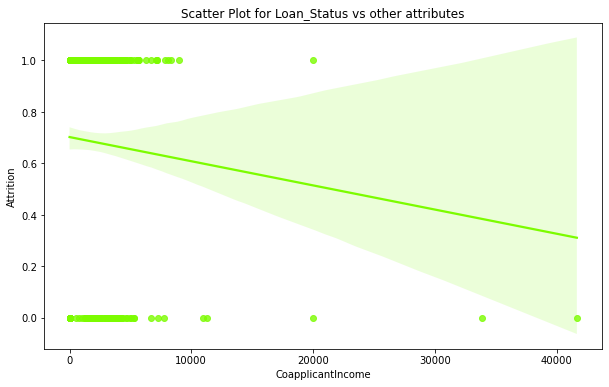

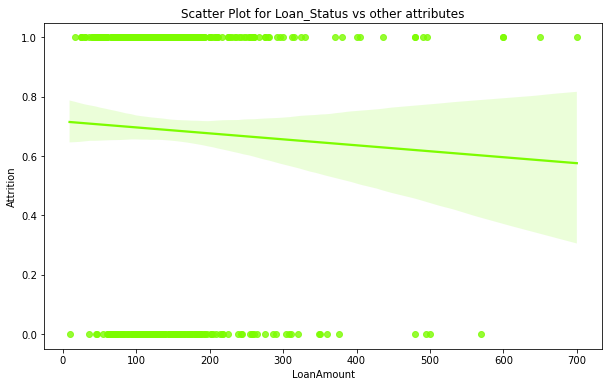

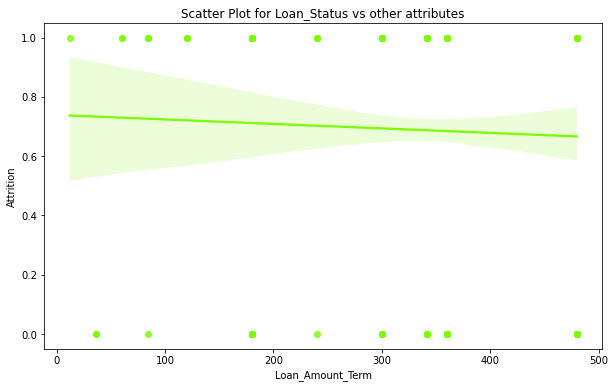

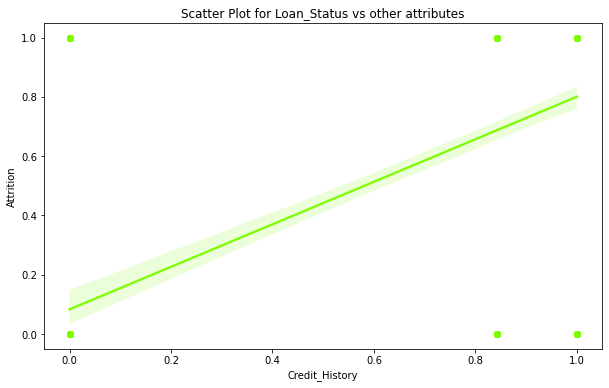

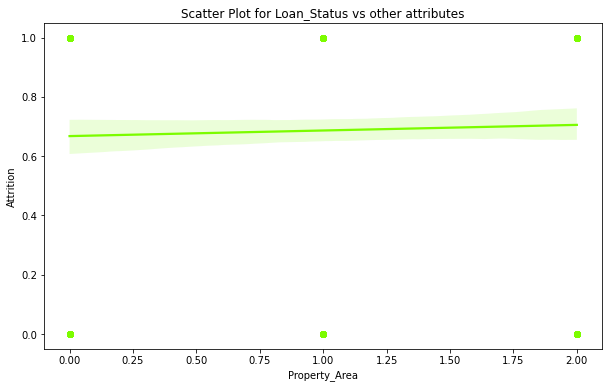

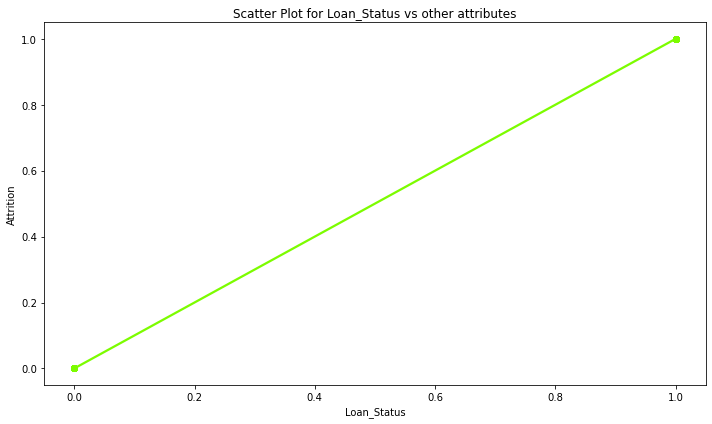

In [200]:
# Correlation analysis with scatterplot

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['Loan_Status'], color= 'lawngreen')
        plt.title('Scatter Plot for Loan_Status vs other attributes')
        plt.xlabel(column)
        plt.ylabel('Attrition')
        
plt.tight_layout()

In [201]:
# there are diverse correlation between the features

In [202]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

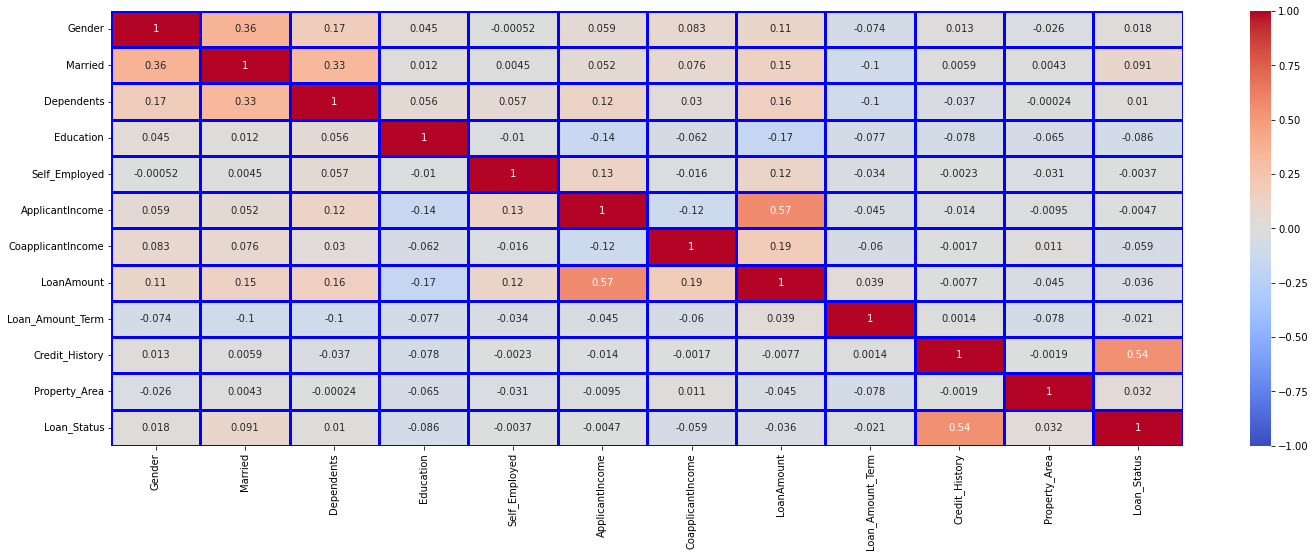

In [203]:
#let us make a heatmap

import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')

In [204]:
# let us now check for the skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [205]:
# skewness is present!

In [206]:
# let us work for the outliers

In [207]:
# Using Z Score to remove outliers

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [208]:
df= df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


In [209]:
# now again check the boxplot

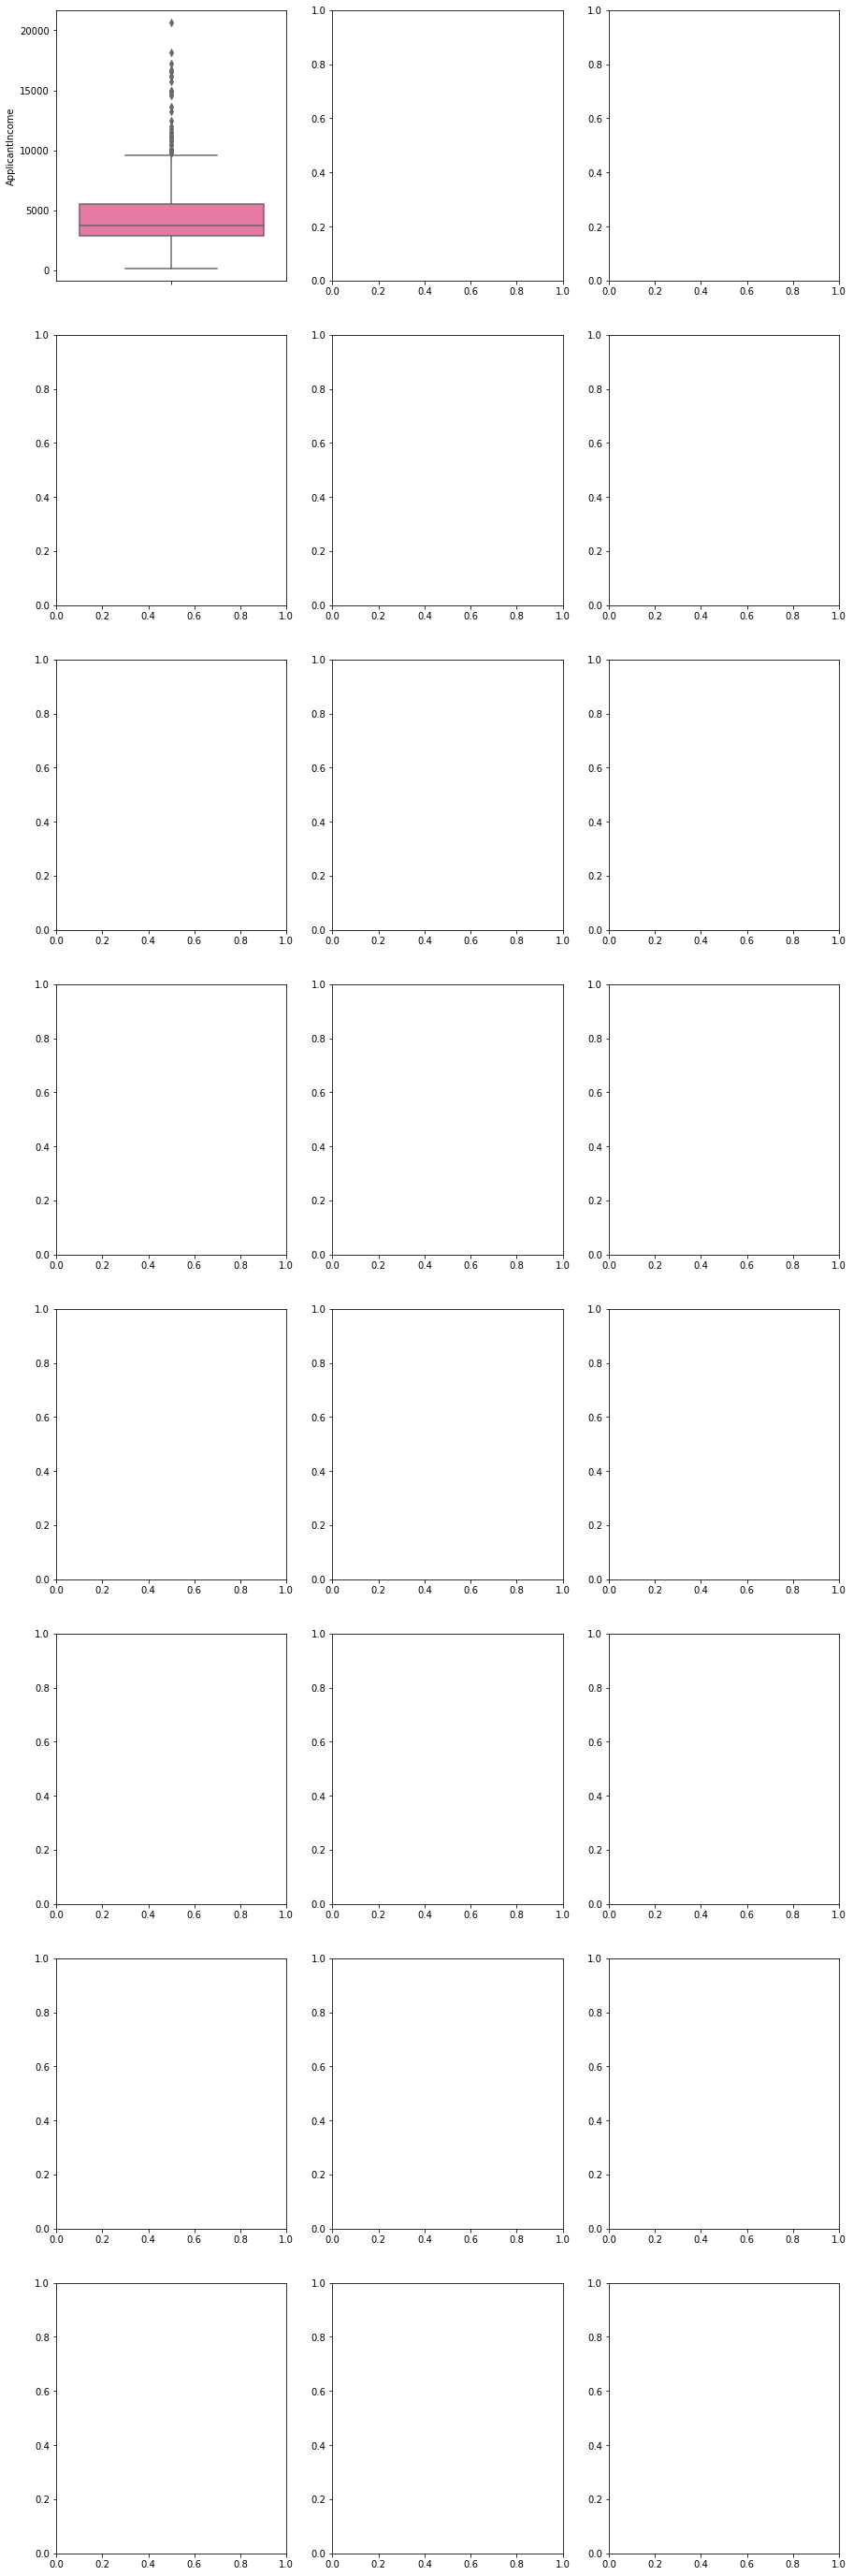

In [210]:
# Boxplot for interger type feature

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

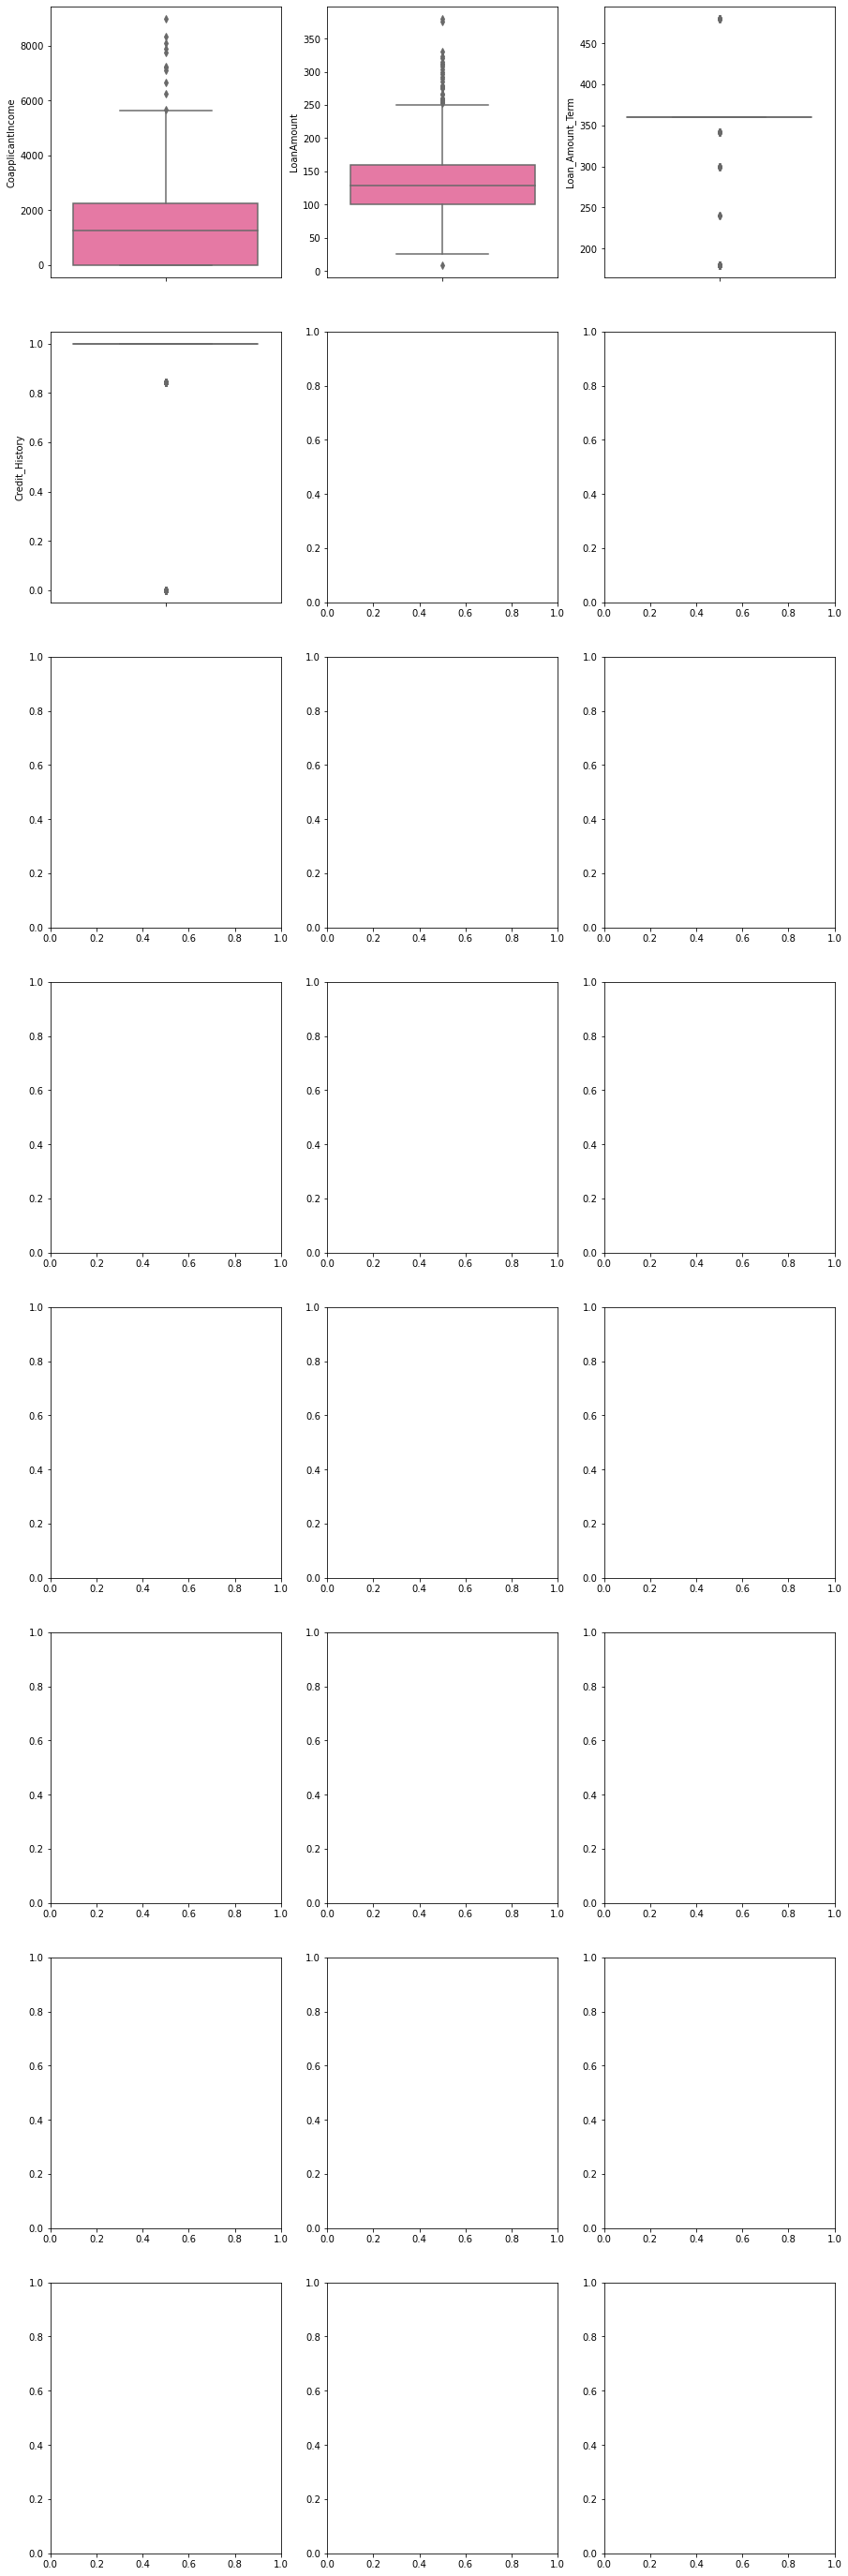

In [211]:
# Boxplot for float type feature

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="RdPu")
    index += 1
plt.show()

In [212]:
# In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it.

In [213]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [214]:
# Using Log Transform to fix skewness

In [215]:
for col in integer_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [216]:
for col in float_datatypes:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [217]:
# Log Transformation has been applied on our numerical datatype columns

In [218]:
# now let's check the skewness again

In [219]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

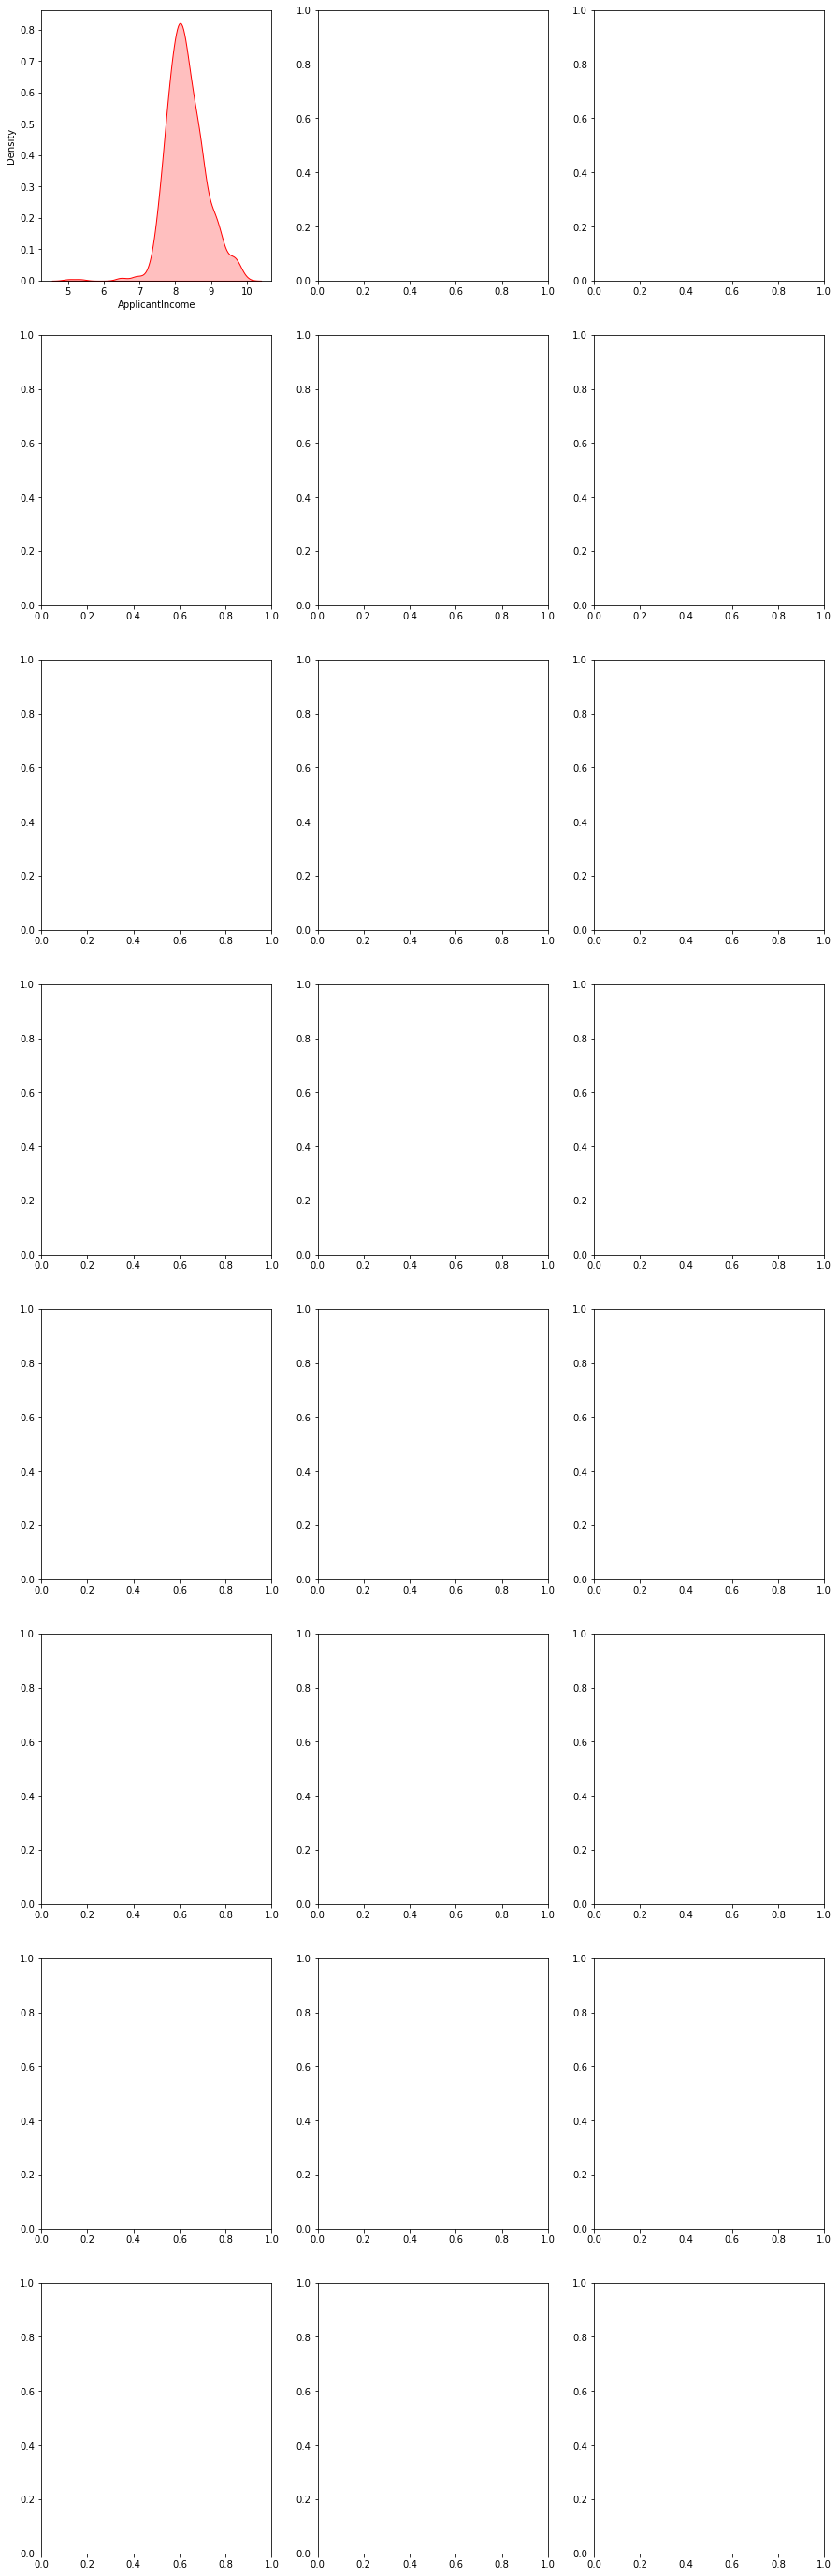

In [220]:
# visualize the skewness

fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

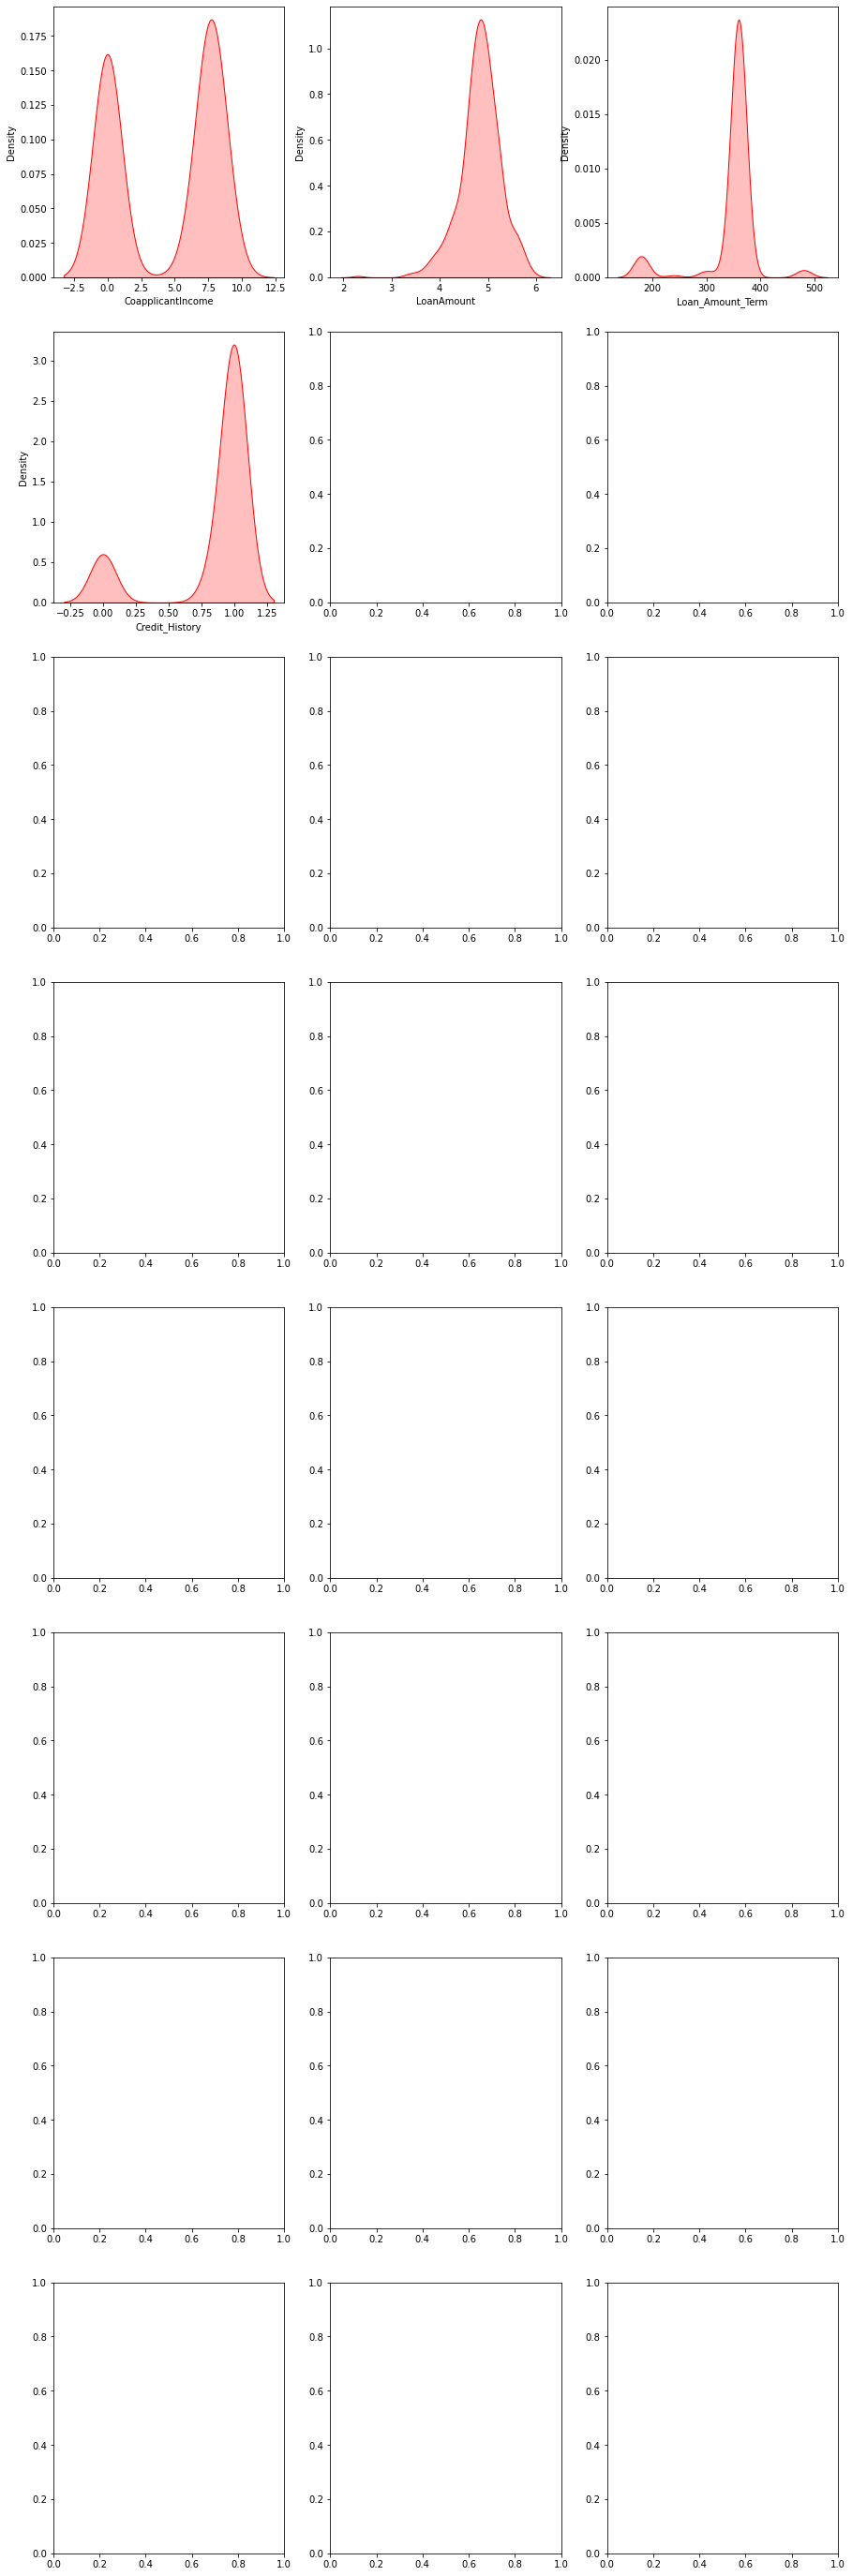

In [221]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[float_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

In [222]:
# mostly the skewness is gone!

In [223]:
# Train-Test split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [224]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.993232,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,4.276666,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,3.713572,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,5.537334,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,5.236442,360.0,1.0,2.0


In [225]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [226]:
# check class imbalance

In [227]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [228]:
# This indicates class imbalance that needed to be fixed by using the oversampling method

In [229]:
# Synthetic Minority Over-sampling Technique (SMOTE)

In [230]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [231]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [232]:
# class imbalance problem is solved!

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.489588,-1.313198,-0.722007,-0.561561,-0.379902,0.740244,-1.100955,0.396645,0.224286,0.609146,1.221734
1,0.489588,0.797580,0.284717,-0.561561,-0.379902,0.282849,0.806402,0.070707,0.224286,0.609146,-1.331111
2,0.489588,0.797580,-0.722007,-0.561561,2.846699,-0.511693,-1.100955,-1.529715,0.224286,0.609146,1.221734
3,0.489588,0.797580,-0.722007,1.888138,-0.379902,-0.792292,0.922834,-0.085695,0.224286,0.609146,1.221734
4,0.489588,-1.313198,-0.722007,-0.561561,-0.379902,0.788042,-1.100955,0.305265,0.224286,0.609146,1.221734
...,...,...,...,...,...,...,...,...,...,...,...
791,-0.216855,-1.313198,-0.722007,-0.561561,-0.379902,-0.914729,-1.100955,-2.539896,0.224286,0.609146,1.221734
792,0.489588,0.797580,1.291441,-0.561561,-0.379902,0.444447,-1.100955,-1.312271,0.224286,-1.844882,-0.041943
793,0.489588,-1.313198,-0.722007,1.828675,-0.379902,0.805357,-1.100955,-0.194134,0.224286,-1.869634,-1.331111
794,0.489588,0.797580,0.284717,-0.561561,0.479358,-1.608225,0.981229,-0.248625,0.224286,0.609146,1.221734


In [308]:
# modelling and train and test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()
knc= KNeighborsClassifier()
bag= BaggingClassifier()
ada= AdaBoostClassifier()
gb= GradientBoostingClassifier()

In [309]:
# LogisticRegression

In [310]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.75 random_state 1
max_accuracy 0.75 max_random_state 1
accuracy 0.73125 random_state 2
accuracy 0.71875 random_state 3
accuracy 0.75625 random_state 4
max_accuracy 0.75625 max_random_state 4
accuracy 0.7375 random_state 5
accuracy 0.76875 random_state 6
max_accuracy 0.76875 max_random_state 6
accuracy 0.70625 random_state 7
accuracy 0.725 random_state 8
accuracy 0.7375 random_state 9
accuracy 0.8125 random_state 10
max_accuracy 0.8125 max_random_state 10
accuracy 0.70625 random_state 11
accuracy 0.7875 random_state 12
accuracy 0.75 random_state 13
accuracy 0.725 random_state 14
accuracy 0.71875 random_state 15
accuracy 0.7875 random_state 16
accuracy 0.675 random_state 17
accuracy 0.6625 random_state 18
accuracy 0.70625 random_state 19
accuracy 0.7375 random_state 20
accuracy 0.7375 random_state 21
accuracy 0.71875 random_state 22
accuracy 0.73125 random_state 23
accuracy 0.74375 random_state 24
accuracy 0.78125 random_state 25
accuracy 0.76875 random_state 26
accuracy 0.737

In [311]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8125 on random_state 10


In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Training the model
lr.fit(X_train, y_train)
    
# Predicting Y_test
pred = lr.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 81.25

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        72
           1       0.78      0.92      0.84        88

    accuracy                           0.81       160
   macro avg       0.83      0.80      0.80       160
weighted avg       0.82      0.81      0.81       160

Cross Validation Score: 74.12500000000001

Accuracy Score - Cross Validation Score is 7.124999999999986


In [313]:
# DecisionTreeClassifier

In [314]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7625 random_state 1
max_accuracy 0.7625 max_random_state 1
accuracy 0.7875 random_state 2
max_accuracy 0.7875 max_random_state 2
accuracy 0.73125 random_state 3
accuracy 0.8125 random_state 4
max_accuracy 0.8125 max_random_state 4
accuracy 0.71875 random_state 5
accuracy 0.775 random_state 6
accuracy 0.79375 random_state 7
accuracy 0.7875 random_state 8
accuracy 0.78125 random_state 9
accuracy 0.74375 random_state 10
accuracy 0.75625 random_state 11
accuracy 0.80625 random_state 12
accuracy 0.825 random_state 13
max_accuracy 0.825 max_random_state 13
accuracy 0.78125 random_state 14
accuracy 0.79375 random_state 15
accuracy 0.79375 random_state 16
accuracy 0.81875 random_state 17
accuracy 0.79375 random_state 18
accuracy 0.725 random_state 19
accuracy 0.79375 random_state 20
accuracy 0.78125 random_state 21
accuracy 0.75625 random_state 22
accuracy 0.76875 random_state 23
accuracy 0.78125 random_state 24
accuracy 0.8 random_state 25
accuracy 0.76875 random_state 26
accuracy 

In [315]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.85625 on random_state 96


In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 115)

# Training the model
dt.fit(X_train, y_train)
    
# Predicting Y_test
pred = dt.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(dt, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 83.125

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        80
           1       0.86      0.79      0.82        80

    accuracy                           0.83       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.83      0.83       160

Cross Validation Score: 78.14701257861635

Accuracy Score - Cross Validation Score is 4.977987421383645


In [317]:
# RandomForestClassifier

In [407]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.83125 random_state 1
max_accuracy 0.83125 max_random_state 1
accuracy 0.8375 random_state 2
max_accuracy 0.8375 max_random_state 2
accuracy 0.8125 random_state 3
accuracy 0.875 random_state 4
max_accuracy 0.875 max_random_state 4
accuracy 0.8125 random_state 5
accuracy 0.8875 random_state 6
max_accuracy 0.8875 max_random_state 6
accuracy 0.85625 random_state 7
accuracy 0.85 random_state 8
accuracy 0.83125 random_state 9
accuracy 0.8375 random_state 10
accuracy 0.81875 random_state 11
accuracy 0.875 random_state 12
accuracy 0.84375 random_state 13
accuracy 0.825 random_state 14
accuracy 0.8 random_state 15
accuracy 0.85625 random_state 16
accuracy 0.83125 random_state 17
accuracy 0.8375 random_state 18
accuracy 0.8125 random_state 19
accuracy 0.85625 random_state 20
accuracy 0.80625 random_state 21
accuracy 0.8375 random_state 22
accuracy 0.8 random_state 23
accuracy 0.83125 random_state 24
accuracy 0.85 random_state 25
accuracy 0.8625 random_state 26
accuracy 0.8625 random_s

In [319]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.91875 on random_state 78


In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 90.625

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.88      0.95      0.92        86

    accuracy                           0.91       160
   macro avg       0.91      0.90      0.90       160
weighted avg       0.91      0.91      0.91       160

Cross Validation Score: 84.05503144654088

Accuracy Score - Cross Validation Score is 6.56996855345912


In [331]:
# SVC

In [332]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= RandomForestClassifier()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8625 random_state 1
max_accuracy 0.8625 max_random_state 1
accuracy 0.83125 random_state 2
accuracy 0.8 random_state 3
accuracy 0.8625 random_state 4
accuracy 0.8125 random_state 5
accuracy 0.8875 random_state 6
max_accuracy 0.8875 max_random_state 6
accuracy 0.84375 random_state 7
accuracy 0.85625 random_state 8
accuracy 0.85625 random_state 9
accuracy 0.825 random_state 10
accuracy 0.7875 random_state 11
accuracy 0.86875 random_state 12
accuracy 0.85 random_state 13
accuracy 0.825 random_state 14
accuracy 0.8125 random_state 15
accuracy 0.8375 random_state 16
accuracy 0.81875 random_state 17
accuracy 0.84375 random_state 18
accuracy 0.8125 random_state 19
accuracy 0.85625 random_state 20
accuracy 0.7875 random_state 21
accuracy 0.81875 random_state 22
accuracy 0.8 random_state 23
accuracy 0.8125 random_state 24
accuracy 0.85625 random_state 25
accuracy 0.85 random_state 26
accuracy 0.8625 random_state 27
accuracy 0.85 random_state 28
accuracy 0.84375 random_state 29
accura

In [408]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.91875 on random_state 78


In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 90.0

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        74
           1       0.88      0.94      0.91        86

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

Cross Validation Score: 84.68396226415095

Accuracy Score - Cross Validation Score is 5.316037735849051


In [251]:
# KNeighborsClassifier

In [341]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    knc= KNeighborsClassifier()
    knc.fit(X_train, y_train)
    prediction= knc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.78125 random_state 1
max_accuracy 0.78125 max_random_state 1
accuracy 0.73125 random_state 2
accuracy 0.7875 random_state 3
max_accuracy 0.7875 max_random_state 3
accuracy 0.75 random_state 4
accuracy 0.74375 random_state 5
accuracy 0.76875 random_state 6
accuracy 0.73125 random_state 7
accuracy 0.78125 random_state 8
accuracy 0.71875 random_state 9
accuracy 0.725 random_state 10
accuracy 0.7 random_state 11
accuracy 0.75625 random_state 12
accuracy 0.70625 random_state 13
accuracy 0.71875 random_state 14
accuracy 0.74375 random_state 15
accuracy 0.78125 random_state 16
accuracy 0.775 random_state 17
accuracy 0.74375 random_state 18
accuracy 0.74375 random_state 19
accuracy 0.775 random_state 20
accuracy 0.75 random_state 21
accuracy 0.78125 random_state 22
accuracy 0.70625 random_state 23
accuracy 0.73125 random_state 24
accuracy 0.80625 random_state 25
max_accuracy 0.80625 max_random_state 25
accuracy 0.7625 random_state 26
accuracy 0.7875 random_state 27
accuracy 0.775 ra

In [342]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.84375 on random_state 68


In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 68)

# Training the model
knc.fit(X_train, y_train)
    
# Predicting Y_test
pred = knc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 84.375

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        65
           1       0.88      0.85      0.87        95

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160

Cross Validation Score: 84.05581761006292

Accuracy Score - Cross Validation Score is 0.31918238993708314


In [344]:
# BaggingClassifier

In [345]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    bag= BaggingClassifier()
    bag.fit(X_train, y_train)
    prediction= bag.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7875 random_state 1
max_accuracy 0.7875 max_random_state 1
accuracy 0.84375 random_state 2
max_accuracy 0.84375 max_random_state 2
accuracy 0.78125 random_state 3
accuracy 0.83125 random_state 4
accuracy 0.775 random_state 5
accuracy 0.8375 random_state 6
accuracy 0.8125 random_state 7
accuracy 0.81875 random_state 8
accuracy 0.83125 random_state 9
accuracy 0.7875 random_state 10
accuracy 0.76875 random_state 11
accuracy 0.85625 random_state 12
max_accuracy 0.85625 max_random_state 12
accuracy 0.79375 random_state 13
accuracy 0.8 random_state 14
accuracy 0.78125 random_state 15
accuracy 0.80625 random_state 16
accuracy 0.79375 random_state 17
accuracy 0.7875 random_state 18
accuracy 0.775 random_state 19
accuracy 0.825 random_state 20
accuracy 0.78125 random_state 21
accuracy 0.8125 random_state 22
accuracy 0.80625 random_state 23
accuracy 0.8 random_state 24
accuracy 0.79375 random_state 25
accuracy 0.8125 random_state 26
accuracy 0.81875 random_state 27
accuracy 0.825 rand

In [346]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.86875 on random_state 68


In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 68)

# Training the model
bag.fit(X_train, y_train)
    
# Predicting Y_test
pred = bag.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.125

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        65
           1       0.93      0.86      0.90        95

    accuracy                           0.88       160
   macro avg       0.88      0.89      0.88       160
weighted avg       0.89      0.88      0.88       160

Cross Validation Score: 83.42845911949685

Accuracy Score - Cross Validation Score is 4.69654088050315


In [348]:
# AdaBoostClassifier

In [349]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    ada= AdaBoostClassifier()
    ada.fit(X_train, y_train)
    prediction= ada.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.8375 random_state 1
max_accuracy 0.8375 max_random_state 1
accuracy 0.78125 random_state 2
accuracy 0.7125 random_state 3
accuracy 0.75625 random_state 4
accuracy 0.78125 random_state 5
accuracy 0.76875 random_state 6
accuracy 0.76875 random_state 7
accuracy 0.7375 random_state 8
accuracy 0.7125 random_state 9
accuracy 0.825 random_state 10
accuracy 0.70625 random_state 11
accuracy 0.85625 random_state 12
max_accuracy 0.85625 max_random_state 12
accuracy 0.7625 random_state 13
accuracy 0.80625 random_state 14
accuracy 0.70625 random_state 15
accuracy 0.80625 random_state 16
accuracy 0.70625 random_state 17
accuracy 0.73125 random_state 18
accuracy 0.78125 random_state 19
accuracy 0.76875 random_state 20
accuracy 0.70625 random_state 21
accuracy 0.78125 random_state 22
accuracy 0.75625 random_state 23
accuracy 0.78125 random_state 24
accuracy 0.80625 random_state 25
accuracy 0.80625 random_state 26
accuracy 0.725 random_state 27
accuracy 0.7625 random_state 28
accuracy 0.7437

In [350]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.85625 on random_state 12


In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Training the model
ada.fit(X_train, y_train)
    
# Predicting Y_test
pred = ada.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 85.625

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82        70
           1       0.84      0.92      0.88        90

    accuracy                           0.86       160
   macro avg       0.86      0.85      0.85       160
weighted avg       0.86      0.86      0.85       160

Cross Validation Score: 85.06132075471697

Accuracy Score - Cross Validation Score is 0.5636792452830264


In [263]:
# GradientBoostingClassifier

In [352]:
#best random state 
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    gb= GradientBoostingClassifier()
    gb.fit(X_train, y_train)
    prediction= gb.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.85 random_state 1
max_accuracy 0.85 max_random_state 1
accuracy 0.81875 random_state 2
accuracy 0.78125 random_state 3
accuracy 0.8375 random_state 4
accuracy 0.8 random_state 5
accuracy 0.84375 random_state 6
accuracy 0.825 random_state 7
accuracy 0.8375 random_state 8
accuracy 0.8375 random_state 9
accuracy 0.825 random_state 10
accuracy 0.79375 random_state 11
accuracy 0.84375 random_state 12
accuracy 0.80625 random_state 13
accuracy 0.8 random_state 14
accuracy 0.80625 random_state 15
accuracy 0.79375 random_state 16
accuracy 0.7875 random_state 17
accuracy 0.81875 random_state 18
accuracy 0.8125 random_state 19
accuracy 0.79375 random_state 20
accuracy 0.775 random_state 21
accuracy 0.825 random_state 22
accuracy 0.78125 random_state 23
accuracy 0.8125 random_state 24
accuracy 0.8375 random_state 25
accuracy 0.83125 random_state 26
accuracy 0.8375 random_state 27
accuracy 0.83125 random_state 28
accuracy 0.8 random_state 29
accuracy 0.8 random_state 30
accuracy 0.80625 

In [353]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8875 on random_state 150


In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

# Training the model
gb.fit(X_train, y_train)
    
# Predicting Y_test
pred = gb.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.125

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        79
           1       0.90      0.86      0.88        81

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

Cross Validation Score: 83.17531446540882

Accuracy Score - Cross Validation Score is 4.9496855345911825


In [355]:
# Let us now check the AUC and ROC

In [356]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

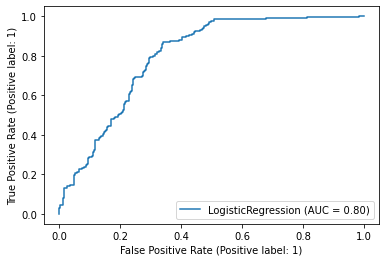

In [357]:
disp= plot_roc_curve(lr, X_train, y_train)

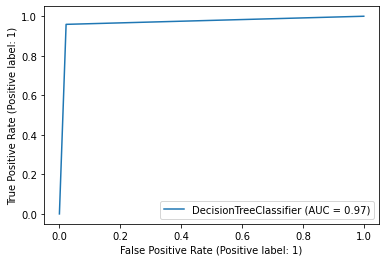

In [358]:
disp= plot_roc_curve(dt, X_train, y_train)

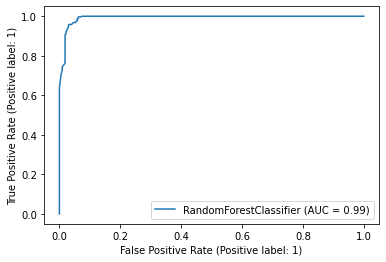

In [410]:
disp= plot_roc_curve(rf, X_train, y_train)

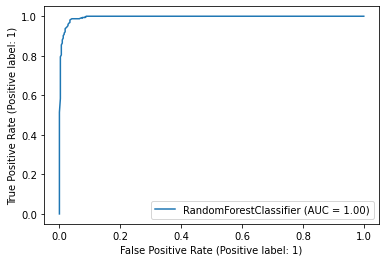

In [360]:
disp= plot_roc_curve(svc, X_train, y_train)

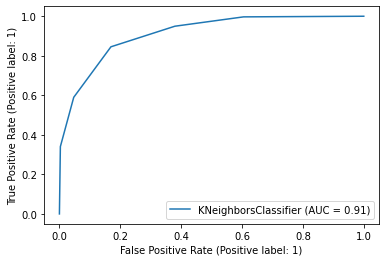

In [361]:
disp= plot_roc_curve(knc, X_train, y_train)

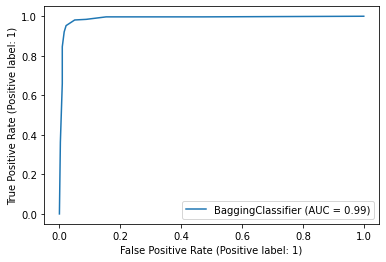

In [362]:
disp= plot_roc_curve(bag, X_train, y_train)

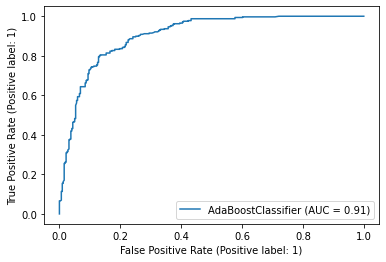

In [363]:
disp= plot_roc_curve(ada, X_train, y_train)

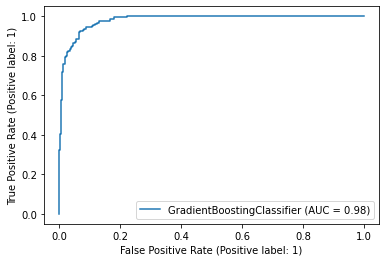

In [364]:
disp= plot_roc_curve(gb, X_train, y_train)

In [365]:
# considering all the above models, we can conclude Random forest Classifier and Support Vector Classifier could be the best model for our problem.
# Let us proceed with this model...

In [435]:
# Random Forest

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

# Training the model
rf.fit(X_train, y_train)
    
# Predicting Y_test
pred = rf.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 91.25

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.91      0.93      0.92        86

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160

Cross Validation Score: 85.187106918239

Accuracy Score - Cross Validation Score is 6.062893081761004


In [419]:
# SVC

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

# Training the model
svc.fit(X_train, y_train)
    
# Predicting Y_test
pred = svc.predict(X_test)
    
# Accuracy Score
acc_score = (accuracy_score(y_test, pred))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 90.0

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        74
           1       0.89      0.93      0.91        86

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

Cross Validation Score: 84.18003144654088

Accuracy Score - Cross Validation Score is 5.81996855345912


In [429]:
# check train and test score for SVC
y_pred= svc.predict(X_train)
pred= svc.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [430]:
train_result

100.0

In [431]:
test_result

90.0

In [436]:
# check train and test score for Random Forest
y_pred= rf.predict(X_train)
pred= rf.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [437]:
train_result

100.0

In [438]:
test_result

91.25

In [413]:
#Hyperparameter tuning for RandomForestClassifier

In [388]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params={'criterion':['entropy'],'max_depth':[4,5,6],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split' :[10,12,15], 
        'min_samples_leaf' :[4,6,8,9],
        'bootstrap':['True'],
        'oob_score':['True'],
        'max_samples':[0.7,0.8],
         }

rf2= RandomForestClassifier()

rfgrid=GridSearchCV(rf2,param_grid=params,cv=4)
rfgrid.fit(X_train,y_train)  
      
print(rfgrid.best_params_)

{'bootstrap': 'True', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'max_samples': 0.8, 'min_samples_leaf': 6, 'min_samples_split': 10, 'oob_score': 'True'}


In [423]:
#Hyperparameter tuning for SVC

from sklearn.model_selection import GridSearchCV

params={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

svc2= SVC()

svcgrid=GridSearchCV(svc2,param_grid=params,cv=4)
svcgrid.fit(X_train,y_train)  
      
print(svcgrid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [405]:
rf2= RandomForestClassifier(bootstrap= 'True', criterion= 'entropy', max_depth= 6, max_features= 'auto', max_samples= 0.8, min_samples_leaf= 6, min_samples_split= 10, oob_score= 'True')
rf2.fit(X_train, y_train)
rf2.score(X_train, y_train)
pred_decision= rf2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(rf2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", abs(result))

Accuracy Score: 89.375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        74
           1       0.83      1.00      0.91        86

    accuracy                           0.89       160
   macro avg       0.92      0.89      0.89       160
weighted avg       0.91      0.89      0.89       160

Cross Validation Score: 78.52751572327044

Accuracy Score - Cross Validation Score is 10.84748427672956


In [428]:
svc2= SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
svc2.score(X_train, y_train)
pred_decision= svc2.predict(X_test)

# Accuracy Score
acc_score = (accuracy_score(y_test, pred_decision))*100
print("Accuracy Score:", acc_score)
    
# Classification Report
class_report = classification_report(y_test, pred_decision)
print("\nClassification Report:\n", class_report)
    
# Cross Validation Score
cv_score = (cross_val_score(svc2, X, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 82.5

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        74
           1       0.87      0.79      0.83        86

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.82       160
weighted avg       0.83      0.82      0.83       160

Cross Validation Score: 79.52908805031448

Accuracy Score - Cross Validation Score is 2.970911949685515


In [ ]:
# In any cases efficiency is not increasing!

In [439]:
# So we will choose the previous SVC model as our final model, as its accuracy was more efficient!

In [440]:
import pickle
filename= 'churn.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [441]:
[]

[]

In [442]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

90.0


In [443]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [444]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,1,0,1,0,1,1,1,0,0,0,...,0,1,0,1,1,1,0,1,1,0
Original,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
